This notebook is aimed at summarising the BGC-related results for 16 sponge metagenomes. It relies on output mainly from the MetaSing pipeline, which includes:
- antiSMASH5 (Blin et al. 2019)
- dRep (Olm et al. 2017)
- GTDB-tk (Chaumeil et al. 2020)  
<br>

It also creates output for figure creation in iTOL (Letunic & Bork 2007)
<br>
<br>
References:
<br>
Blin, K., Shaw, S., Steinke, K., Villebro, R., Ziemert, N., Lee, S. Y., ... & Weber, T. (2019). antiSMASH 5.0: updates to the secondary metabolite genome mining pipeline. Nucleic acids research, 47(W1), W81-W87.
<br>
Olm, M. R., Brown, C. T., Brooks, B., & Banfield, J. F. (2017). dRep: a tool for fast and accurate genomic comparisons that enables improved genome recovery from metagenomes through de-replication. The ISME journal, 11(12), 2864-2868.
<br>
Chaumeil, P. A., Mussig, A. J., Hugenholtz, P., & Parks, D. H. (2020). GTDB-Tk: a toolkit to classify genomes with the Genome Taxonomy Database.
<br>
Letunic, I., & Bork, P. (2007). Interactive Tree Of Life (iTOL): an online tool for phylogenetic tree display and annotation. Bioinformatics, 23(1), 127-128.


In [1]:
from Bio import SeqIO
import os
import fnmatch
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import colors

## Overall summary

In [2]:
overall_summary_df = pd.read_csv("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/Sponge_paper_general_summary_stats.csv")
print(overall_summary_df["BGCs"].sum())
overall_summary_df


2670


,Sample,Sequencing output,N50,"Total length (≥ 1,000 bp)",# MAGs,# HQ MAGs,BGCs,complete_BGCs
0,0977,43.44,9948,475953997,66,36,221,86
1,7375,29.90,2409,504957411,16,6,93,22
2,MHpat150,22.10,3816,397458873,21,12,106,47
3,MHs1,13.59,2807,208520661,7,1,41,8
4,MHs2,15.38,2889,243615086,8,3,57,16
5,MHs3,15.16,2819,230585775,12,4,60,16
6,MHs5,11.48,3011,151400149,5,1,21,9
7,CS200,29.24,11682,479674948,79,25,290,86
8,CS202,22.44,3575,507780759,55,28,196,56
9,CS203,24.58,4498,608488494,53,26,225,58


In [3]:
# Apparently pairplot doesn't like float values
overall_summary_df2 = overall_summary_df.copy()
overall_summary_df2["Sequencing output"] = overall_summary_df2["Sequencing output"].astype(int)

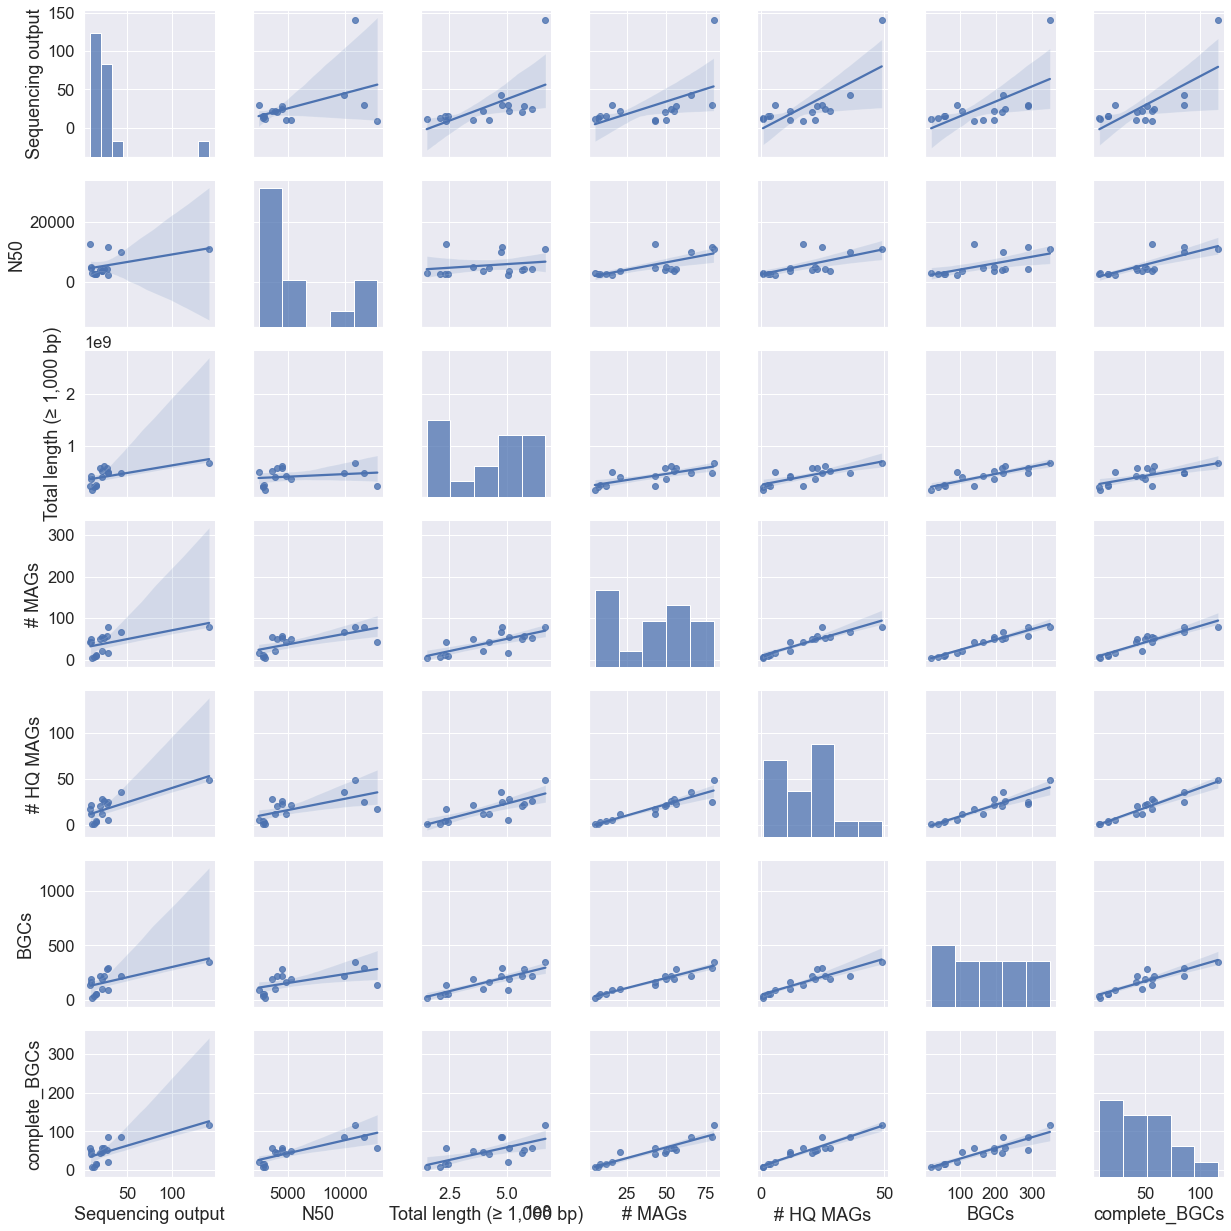

In [4]:
seaborn.set(font_scale=1.5)
overall_summary_pairplot = seaborn.pairplot(overall_summary_df2, kind="reg")
#plt.savefig("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/Sponge_paper_overall_summary_plot.pdf")


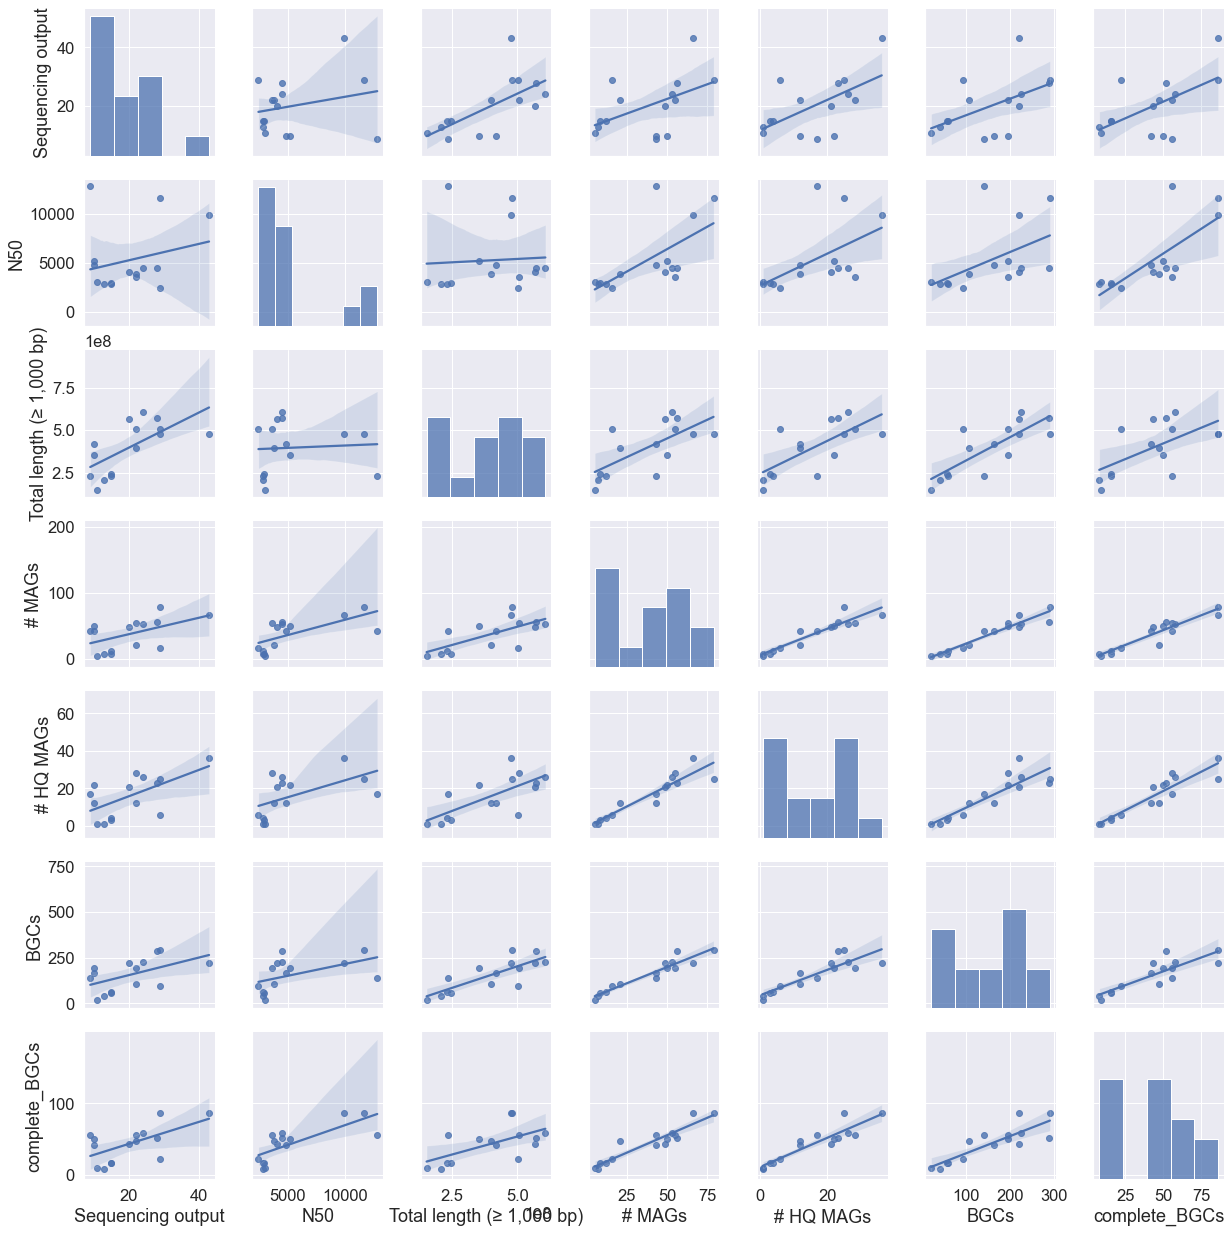

In [5]:
seaborn.set(font_scale=1.5)
overall_summary_pairplot_noAplysina = seaborn.pairplot(overall_summary_df2.drop(13), kind="reg")


# BGC summary

## Summary of all 2,760 BGCs

In [6]:
all_2670_BGCs_dir = "/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/antiSMASH_gbks/"

In [7]:
# One region per individual gbk file
# NOTE that feature.qualifiers['product'][0] only gets first word if more than one!!
region_count = 0
all_2670_BGCs_dict = {}
for filename in os.listdir(all_2670_BGCs_dir):
    BGC_gbk = SeqIO.parse(all_2670_BGCs_dir+filename, 'genbank')
    for record in BGC_gbk:  
        for feature in record.features:
            if feature.type == 'region':
                all_2670_BGCs_dict[filename] = [filename.split("_")[0],feature.qualifiers['product'],
                                              feature.qualifiers['contig_edge'][0],
                                                feature.location.end-feature.location.start,
                                               record.description]
                region_count += 1
            
print(region_count)

2670


In [8]:
all_2670_BGCs_df = pd.DataFrame.from_dict(all_2670_BGCs_dict, orient='index',
                       columns=['sample', 'product', 'on_contig_edge', 'length', 'contig'])
all_2670_BGCs_df

,sample,product,on_contig_edge,length,contig
CS204_c02748_NODE_27...region001.gbk,CS204,[T1PKS],True,18771,NODE_2748_length_18771_cov_2.226668
Aplysina_all_c01676_NODE_16...region001.gbk,Aplysina,[NRPS-like],True,27708,NODE_1676_length_45076_cov_3.157601
CS203_c10848_NODE_10...region001.gbk,CS203,[T3PKS],True,7240,NODE_10848_length_7240_cov_19.231126
MHs1_c00299_NODE_29...region001.gbk,MHs1,"[NRPS, T1PKS]",True,29982,NODE_299_length_29982_cov_1.243041
CS783_c00230_NODE_23...region001.gbk,CS783,[terpene],False,23354,NODE_230_length_106564_cov_4.199545
...,...,...,...,...,...
CS200_c00300_NODE_30...region001.gbk,CS200,[terpene],True,16103,NODE_300_length_97681_cov_14.945087
Petrosia_c09641_NODE_96...region001.gbk,Petrosia,[bacteriocin],True,5878,NODE_9641_length_5878_cov_3.980873
CS204_c01473_NODE_14...region001.gbk,CS204,[terpene],True,12345,NODE_1473_length_29015_cov_3.348172
CS211_c02819_NODE_28...region001.gbk,CS211,[NRPS-like],True,20149,NODE_2819_length_20149_cov_1.948607


In [9]:
# Number of "hybrid BGCs" as defined in this work
# NOTE doesn't need to match the number of regions below since a chemical hybrid can be a single candidate BGC 
print(len(all_2670_BGCs_df[all_2670_BGCs_df['product'].apply(lambda x: len(x) > 1)]))

70


In [10]:
# Count the number of candidate BGCs identified
candidate_cluster_count = 0
candidate_cluster_count_2 = 0
neighbouring_count = 0
interleaved_count = 0
chem_hybrid_count = 0
single_count = 0

for filename in os.listdir(all_2670_BGCs_dir):
    BGC_gbk = SeqIO.parse(all_2670_BGCs_dir+filename, 'genbank')
    for record in BGC_gbk:  
        for feature in record.features:
            if feature.type == 'region':
                # this qualifier is a list enumerating candidate clusters in a region 
                candidate_cluster_count += len(feature.qualifiers['candidate_cluster_numbers'])
            elif feature.type == 'cand_cluster':
                candidate_cluster_count_2 += 1
                if feature.qualifiers['kind'][0] == 'single':
                    single_count += 1
                if feature.qualifiers['kind'][0] == 'interleaved':
                    interleaved_count += 1
                if feature.qualifiers['kind'][0] == 'chemical_hybrid':
                    chem_hybrid_count += 1
                if feature.qualifiers['kind'][0] == 'neighbouring':
                    neighbouring_count += 1
                
print(candidate_cluster_count)
print(candidate_cluster_count_2)
print(single_count)
print(interleaved_count)
print(chem_hybrid_count)
print(neighbouring_count)


2715
2715
2642
19
22
32


In [11]:
# Convert product list into string
# NEED TO sort list first since hybrid order is not consistent
all_2670_BGCs_df_tmp = all_2670_BGCs_df.copy()
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df['product'].apply(lambda x: x.sort())
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df['product'].apply(lambda x: '-'.join(x))
print(len(set(all_2670_BGCs_df_tmp['product'].tolist())))
all_2670_BGCs_df_tmp['product'].value_counts()

52


terpene                               836
T1PKS                                 538
bacteriocin                           443
NRPS-like                             248
betalactone                           123
T3PKS                                  76
transAT-PKS-like                       53
arylpolyene                            42
NRPS                                   36
ectoine                                36
phosphonate                            35
lassopeptide                           31
lanthipeptide                          19
other                                  18
LAP                                    17
hserlactone                            14
NRPS-transAT-PKS-like                   8
NRPS-T1PKS                              8
bacteriocin-proteusin                   7
nucleoside                              7
bacteriocin-lanthipeptide               6
TfuA-related                            5
LAP-lassopeptide                        5
LAP-bacteriocin                   

In [12]:
all_2670_BGCs_df_tmp[all_2670_BGCs_df_tmp['on_contig_edge'] == 'False']['product'].value_counts()

terpene                               268
bacteriocin                           201
T1PKS                                  75
NRPS-like                              63
betalactone                            59
ectoine                                16
T3PKS                                  12
arylpolyene                             9
phosphonate                             9
other                                   7
NRPS                                    6
hserlactone                             6
oligosaccharide                         5
LAP-lassopeptide                        5
lanthipeptide                           4
bacteriocin-proteusin                   3
lassopeptide                            3
bacteriocin-lanthipeptide               2
LAP                                     2
resorcinol                              2
bacteriocin-terpene                     2
hglE-KS                                 1
T1PKS-hglE-KS                           1
TfuA-related-bacteriocin-proteusin

In [13]:
# Summarise BGC product names for concise figures
RiPP_list = ['head_to_tail','lanthipeptide','TfuA-related','lassopeptide','proteusin','LAP',
             'thiopeptide']
RiPP_hybrid_list = ['LAP-lassopeptide','LAP-thiopeptide','LAP-proteusin','TfuA-related-proteusin']
bacteriocin_RiPP_hybrid_list = ['bacteriocin-thiopeptide','LAP-bacteriocin',
                          'bacteriocin-proteusin','TfuA-related-bacteriocin-proteusin',
                               'bacteriocin-lanthipeptide']
PKS_list = ['T2PKS','T3PKS','hglE-KS','transAT-PKS-like','arylpolyene','transAT-PKS','T1PKS',
            'PKS-like','resorcinol',]
PKS_hybrid_list = ['T3PKS-transAT-PKS','arylpolyene-resorcinol','arylpolyene-ladderane',
                  'T1PKS-hglE-KS','PKS-like-T3PKS']
NRPS_list = ['NRPS-like','CDPS']
NRPS_PKS_hybrid_list = ['NRPS-transAT-PKS-like','NRPS-T1PKS','NRPS-like-transAT-PKS-like',
                       'NRPS-like-T1PKS','NRPS-transAT-PKS']
mixed_hybrid_bin = ['bacteriocin-terpene','NRPS-like-terpene','NRPS-like-betalactone',
                'phosphonate-terpene']
other_list = ['betalactone','ectoine','phosphonate','hserlactone','nucleoside',
              'oligosaccharide','siderophore','ladderane']
# bgc_df_MAG_summary['product'] = bgc_df_MAG_summary['product'].replace(
#     ['ectoine','oligosaccharide','hserlactone','ladderane','siderophore','betalactone','phosphonate','nucleoside'],'other')

all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(RiPP_list,'RiPP')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(RiPP_hybrid_list,'RiPP hybrid')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(bacteriocin_RiPP_hybrid_list,'bacteriocin-RiPP hybrid')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(PKS_list,'PKS')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(PKS_hybrid_list,'PKS hybrid')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(NRPS_list,'NRPS')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(NRPS_PKS_hybrid_list,'NRPS-PKS hybrid')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(mixed_hybrid_bin,'mixed hybrid')
all_2670_BGCs_df_tmp['product'] = all_2670_BGCs_df_tmp['product'].replace(other_list,'other')

all_2670_BGCs_df_tmp['product'].value_counts()


terpene                    836
PKS                        719
bacteriocin                443
NRPS                       285
other                      243
RiPP                        74
NRPS-PKS hybrid             24
bacteriocin-RiPP hybrid     21
RiPP hybrid                 11
PKS hybrid                   7
mixed hybrid                 7
Name: product, dtype: int64

In [14]:
all_2670_BGCs_df_tmp[all_2670_BGCs_df_tmp['on_contig_edge'] == 'False']['product'].value_counts()


terpene                    268
bacteriocin                201
other                      103
PKS                         99
NRPS                        69
RiPP                        10
bacteriocin-RiPP hybrid      7
RiPP hybrid                  5
mixed hybrid                 3
PKS hybrid                   2
Name: product, dtype: int64

In [15]:
# Make a color_dict to use for BGC classes (summarised)
color_dict = {
    'terpene':'#f0e442',
    'PKS':'#e69f00',
    'bacteriocin':'#009e73',
    'NRPS':'#fabdea',
    'other':'#999999',
    'RiPP':'#56b4e9',
    'NRPS-PKS hybrid':'#f81ce5',
    'bacteriocin-RiPP hybrid':'#674ea7',
    'RiPP hybrid':'#0b5394',
    'PKS hybrid':'#fb7403',
    'mixed hybrid':'#783f04',
}

In [16]:
# Make a dataframe containing both summary counts
raw_count_df = all_2670_BGCs_df_tmp['product'].value_counts().to_frame('raw_count')
comp_count_df = all_2670_BGCs_df_tmp[all_2670_BGCs_df_tmp['on_contig_edge'] == 'False']['product'].value_counts().to_frame('complete_count')
BGC_summary_df_both = pd.merge(raw_count_df, comp_count_df, left_index=True, right_index=True, how='outer')
BGC_summary_df_both.reset_index(inplace=True)
BGC_summary_df_both = BGC_summary_df_both.rename(columns={'index':'product'})
BGC_summary_df_both = BGC_summary_df_both.melt(id_vars='product', value_vars=['product','raw_count','complete_count'])
BGC_summary_df_both = BGC_summary_df_both.rename(columns={'value':'# BGCs'})
BGC_summary_df_both = BGC_summary_df_both.sort_values(['variable',"# BGCs"], ascending=False)
BGC_summary_df_both


,product,variable,# BGCs
10,terpene,raw_count,836.0
2,PKS,raw_count,719.0
6,bacteriocin,raw_count,443.0
0,NRPS,raw_count,285.0
9,other,raw_count,243.0
4,RiPP,raw_count,74.0
1,NRPS-PKS hybrid,raw_count,24.0
7,bacteriocin-RiPP hybrid,raw_count,21.0
5,RiPP hybrid,raw_count,11.0
3,PKS hybrid,raw_count,7.0


/var/folders/4q/44sm58cd3d38vh_kwv88hfdr0000gn/T/ipykernel_2643/1469583476.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


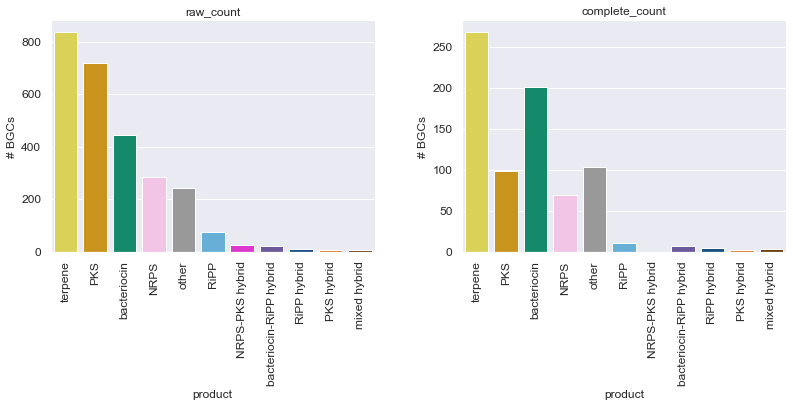

In [17]:
BGC_summary_df_both_plot = seaborn.catplot(x="product", y="# BGCs", col="variable", 
                                           data=BGC_summary_df_both, kind="bar",
                                          palette=color_dict, sharey=False, aspect=1.2)

for ax in BGC_summary_df_both_plot.axes.flat:
    ax.set_ylabel("# BGCs", fontsize=12)
    ax.set_xlabel("product", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 , fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    
BGC_summary_df_both_plot.set_titles("{col_name}", size=12)

plt.subplots_adjust(bottom=0.25)

#BGC_summary_df_both_plot.savefig("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/bgc_summary_both.pdf")


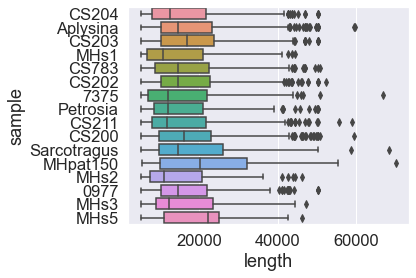

In [19]:
all_2670_BGCs_length_boxplot = seaborn.boxplot(data=all_2670_BGCs_df, x="length", y="sample")
plt.subplots_adjust(left=0.25)
#plt.savefig("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/Sponge_paper_bgc_length_boxplot.pdf")


In [20]:
# Identify regions with more than one candidate BGC -> may need deduplication in taxonomy plots
# Note that there are 32 neighbouring candidate BGCs, which should in theory be split into >=2
# However this doesn't affect the merge of regions and candidate BGCs as shown below 
region_count = 0
not_one_cand_count = 0
not_one_cand_dict = {}
for filename in os.listdir(all_2670_BGCs_dir):
    BGC_gbk = SeqIO.parse(all_2670_BGCs_dir+filename, 'genbank')
    for record in BGC_gbk:  
        for feature in record.features:
            if feature.type == 'region':
                if len(feature.qualifiers['candidate_cluster_numbers']) > 1:
                    not_one_cand_dict[filename] = [filename.split("_")[0],feature.qualifiers['product'],
                                                   feature.qualifiers['contig_edge'][0],
                                                   feature.location.end-feature.location.start,
                                                   record.description]
                    not_one_cand_count += 1
                region_count += 1
                
print(not_one_cand_count)            
print(region_count)


28
2670


In [21]:
# Make a dataframe of the 28 regions and count number of candidate BGCs in regions
not_one_cand_df = pd.DataFrame.from_dict(not_one_cand_dict, orient='index',
                       columns=['sample', 'product', 'on_contig_edge', 'length', 'contig'])
not_one_cand_list = not_one_cand_df['product'].tolist()
print(len(list(itertools.chain.from_iterable(not_one_cand_list))))

# Make list of BGCs that may need deduplication further down
not_one_cand_BGC_list = not_one_cand_df.index.tolist()
not_one_cand_df

55


,sample,product,on_contig_edge,length,contig
Petrosia_c00100_NODE_10...region001.gbk,Petrosia,"[NRPS-like, terpene]",True,31390,NODE_100_length_133645_cov_6.294035
Aplysina_all_c00315_NODE_31...region001.gbk,Aplysina,"[thiopeptide, bacteriocin]",True,36118,NODE_315_length_122801_cov_10.366785
0977_c02026_NODE_20...region001.gbk,0977,"[lanthipeptide, bacteriocin]",True,20871,NODE_2026_length_29257_cov_6.062101
Aplysina_all_c01521_NODE_15...region001.gbk,Aplysina,"[ladderane, arylpolyene]",True,44590,NODE_1521_length_47921_cov_1.185839
Sarcotragus_c00445_NODE_44...region001.gbk,Sarcotragus,[NRPS-like],True,58746,NODE_445_length_65175_cov_12.775981
0977_c00508_NODE_50...region001.gbk,0977,"[bacteriocin, terpene]",False,22342,NODE_508_length_81709_cov_9.683925
CS203_c05650_NODE_56...region001.gbk,CS203,"[lanthipeptide, bacteriocin]",True,12416,NODE_5650_length_12416_cov_1.467003
MHs1_c00002_NODE_2_...region001.gbk,MHs1,"[lassopeptide, LAP]",False,25857,NODE_2_length_607242_cov_4.736910
7375_c00046_NODE_46...region001.gbk,7375,"[resorcinol, arylpolyene]",False,45927,NODE_46_length_178999_cov_3.311357
Aplysina_all_c02499_NODE_24...region001.gbk,Aplysina,"[proteusin, TfuA-related]",True,27730,NODE_2499_length_33579_cov_2.828919


## Prepare data for circular bar plots (in R)
These plots were created using RStudio outside of this notebook

In [32]:
# product_circ_all_2670_BGCs_df = all_2670_BGCs_df_tmp.groupby("sample")["product"].value_counts().to_frame()
# product_circ_all_2670_BGCs_df = product_circ_all_2670_BGCs_df.rename(columns={"product": "count"})
# product_circ_all_2670_BGCs_df = product_circ_all_2670_BGCs_df.reset_index()
# #Split by region and recombine
# product_circ_df_NZ = product_circ_all_2670_BGCs_df[product_circ_all_2670_BGCs_df["sample"].isin(['0977','7375','MHpat150','MHs1','MHs2','MHs3','MHs5'])]
# product_circ_df_NZ["group"] = "NZ"
# product_circ_df_Ton = product_circ_all_2670_BGCs_df[product_circ_all_2670_BGCs_df["sample"].isin(['CS200','CS202','CS203','CS204','CS211','CS783'])]
# product_circ_df_Ton["group"] = "Tonga"
# product_circ_df_Med = product_circ_all_2670_BGCs_df[product_circ_all_2670_BGCs_df["sample"].isin(['Aplysina','Sarcotragus','Petrosia'])]
# product_circ_df_Med["group"] = "Mediterranean"
# product_circ_all_2670_BGCs_df = pd.concat([product_circ_df_NZ,product_circ_df_Ton,product_circ_df_Med])
# product_circ_all_2670_BGCs_df
# product_circ_all_2670_BGCs_df.to_csv("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/antiSMASH_gbks_all_2670_product_circ_df_110223.tsv", sep='\t')


In [25]:
# product_circ_complete_BGCs_df = all_2670_BGCs_df_tmp[all_2670_BGCs_df_tmp['on_contig_edge'] == 'False'].groupby("sample")["product"].value_counts().to_frame()
# product_circ_complete_BGCs_df = product_circ_complete_BGCs_df.rename(columns={"product": "count"})
# product_circ_complete_BGCs_df = product_circ_complete_BGCs_df.reset_index()
# #Split by region and recombine
# product_circ_df_NZ = product_circ_complete_BGCs_df[product_circ_complete_BGCs_df["sample"].isin(['0977','7375','MHpat150','MHs1','MHs2','MHs3','MHs5'])]
# product_circ_df_NZ["group"] = "NZ"
# product_circ_df_Ton = product_circ_complete_BGCs_df[product_circ_complete_BGCs_df["sample"].isin(['CS200','CS202','CS203','CS204','CS211','CS783'])]
# product_circ_df_Ton["group"] = "Tonga"
# product_circ_df_Med = product_circ_complete_BGCs_df[product_circ_complete_BGCs_df["sample"].isin(['Aplysina','Sarcotragus','Petrosia'])]
# product_circ_df_Med["group"] = "Mediterranean"
# product_circ_complete_BGCs_df = pd.concat([product_circ_df_NZ,product_circ_df_Ton,product_circ_df_Med])
# product_circ_complete_BGCs_df
# product_circ_complete_BGCs_df.to_csv("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/antiSMASH_gbks_all_2670_product_complete_circ_110223.tsv", sep='\t')


## Summary of the 1,898 BGCs attributed to a MAG
Note that 8 BGCs were mapped to the same MAG within a sample as outlined below

In [26]:
base_dir = "/Users/vincentn/Documents/Sequencing/BGC_to_bin_mapping_300820/"

In [27]:
# Create BGC summary datframe whilst ignoring non-relevant datasets
# This is based on MetaSing output where taxonomy is identified by GTDB-tk
df_list = []
count=0

matches = ["AplysinaM", "AplysinaP", "Aplysina_BB", "Aplysina_FT", "Aplysina_PK"]
for filename in os.listdir(base_dir):
    if fnmatch.fnmatch(filename, '*final_bin_bgc_df.tsv'):
        if any(x in filename for x in matches):
            continue
        else:
            sname = filename.split("_")[0]
            df = pd.read_csv(os.path.join(base_dir,filename),sep='\t')
            df['sample'] = sname
            print("df for "+ str(sname) + " is " + str(len(df)) + " lines long")
            print("df for "+ str(sname) + " has " + str(len(df[df["candidate_cluster_length"].isna() == False])) + " BGCs associated with a MAG")
            df_list.append(df)
            
bgc_df = pd.concat(df_list, axis=0, ignore_index=True)
print("The final bgc_df is " + str(len(bgc_df)) + " lines long")

df for MHpat150 is 7450 lines long
df for MHpat150 has 100 BGCs associated with a MAG
df for CS204 is 17453 lines long
df for CS204 has 144 BGCs associated with a MAG
df for MHs2 is 3455 lines long
df for MHs2 has 43 BGCs associated with a MAG
df for CS200 is 23923 lines long
df for CS200 has 232 BGCs associated with a MAG
df for 7375 is 7869 lines long
df for 7375 has 45 BGCs associated with a MAG
df for MHs3 is 5149 lines long
df for MHs3 has 42 BGCs associated with a MAG
df for Aplysina is 23019 lines long
df for Aplysina has 247 BGCs associated with a MAG
df for CS211 is 21609 lines long
df for CS211 has 185 BGCs associated with a MAG
df for 0977 is 18821 lines long
df for 0977 has 182 BGCs associated with a MAG
df for MHs5 is 5522 lines long
df for MHs5 has 18 BGCs associated with a MAG
df for Petrosia is 19051 lines long
df for Petrosia has 145 BGCs associated with a MAG
df for CS203 is 20995 lines long
df for CS203 has 151 BGCs associated with a MAG
df for MHs1 is 2830 lines lon

In [28]:
# Add a phylum column to the dataframe
bgc_df["phylum"] = bgc_df["classification"].str.split(';', expand=True)[1]

## Deconvolute the 'duplicate' candidate BGCs and identify BGCs mapped to more than one bin
- Use 'product_x' for the correct BGC product class of the region
- Use of 'candidate_cluster_kind' below is simply for row counting

In [29]:
# Make a unique identifier (sample+contig_id+region_length) and merge dataframes
# Several BGCs on contig shouldn't matter since contig has one taxonomy
# Neighbouring candidate_clusters being split into singles resolved since... 
# region length should match neighbouring candidate_cluster length, thus eliminating singles

all_2670_BGCs_df_tmp2 = all_2670_BGCs_df_tmp.copy()
all_2670_BGCs_df_tmp2["unique_id"] = all_2670_BGCs_df_tmp2["sample"]+all_2670_BGCs_df_tmp2["contig"].str.split("_", expand=True)[1].astype(str)+all_2670_BGCs_df_tmp2["length"].astype(str)

bgc_df_tmp = bgc_df[bgc_df['candidate_cluster_length'].isna() == False]
bgc_df_tmp["unique_id"] = bgc_df_tmp["sample"]+bgc_df_tmp["contig"].str.split("_", expand=True)[1].astype(str)+bgc_df_tmp["candidate_cluster_length"].astype(int).astype(str)

new_df = pd.merge(all_2670_BGCs_df_tmp2, bgc_df_tmp, on='unique_id', how='left')
new_df


/var/folders/4q/44sm58cd3d38vh_kwv88hfdr0000gn/T/ipykernel_2643/2323350265.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bgc_df_tmp["unique_id"] = bgc_df_tmp["sample"]+bgc_df_tmp["contig"].str.split("_", expand=True)[1].astype(str)+bgc_df_tmp["candidate_cluster_length"].astype(int).astype(str)


,sample_x,product_x,on_contig_edge_x,length,contig_x,unique_id,Unnamed: 0,bin,contig_y,contig_length,...,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings,class,sample_y,phylum
0,CS204,PKS,True,18771,NODE_2748_length_18771_cov_2.226668,CS204274818771,17179.0,bin.82.fa.metabat2,NODE_2748_length_18771_cov_2.226668,18771.0,...,taxonomic classification defined by topology a...,NaN,NaN,92.84,11.0,0.965242,Genome not assigned to closest species as it f...,c__Rhodothermia,CS204,p__Bacteroidota
1,Aplysina,NRPS,True,27708,NODE_1676_length_45076_cov_3.157601,Aplysina167627708,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS203,PKS,True,7240,NODE_10848_length_7240_cov_19.231126,CS203108487240,5388.0,bin.2.fa.maxbin2,NODE_10848_length_7240_cov_19.231126,7240.0,...,taxonomic novelty determined using RED,NaN,NaN,93.27,11.0,0.800114,NaN,c__Vicinamibacteria,CS203,p__Acidobacteriota
3,MHs1,NRPS-PKS hybrid,True,29982,NODE_299_length_29982_cov_1.243041,MHs129929982,1261.0,bin.5.fa.metabat2,NODE_299_length_29982_cov_1.243041,29982.0,...,taxonomic classification defined by topology a...,NaN,NaN,89.58,11.0,0.673398,NaN,c__Gammaproteobacteria,MHs1,p__Proteobacteria
4,CS783,terpene,False,23354,NODE_230_length_106564_cov_4.199545,CS78323023354,9668.0,bin.31.fa.metabat2,NODE_230_length_106564_cov_4.199545,106564.0,...,taxonomic classification defined by topology a...,NaN,NaN,86.31,11.0,0.917591,NaN,c__Gemmatimonadetes,CS783,p__Gemmatimonadota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,CS200,terpene,True,16103,NODE_300_length_97681_cov_14.945087,CS20030016103,1064.0,bin.5.fa.metabat2,NODE_300_length_97681_cov_14.945087,97681.0,...,taxonomic classification defined by topology a...,NaN,NaN,85.95,11.0,0.910478,NaN,c__WGA-4E,CS200,p__Poribacteria
2674,Petrosia,bacteriocin,True,5878,NODE_9641_length_5878_cov_3.980873,Petrosia96415878,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2675,CS204,terpene,True,12345,NODE_1473_length_29015_cov_3.348172,CS204147312345,11862.0,cluster_DBSCAN_round2_1,NODE_1473_length_29015_cov_3.348172,29015.0,...,taxonomic classification fully defined by topo...,NaN,NaN,91.25,11.0,0.843502,NaN,c__Gammaproteobacteria,CS204,p__Proteobacteria
2676,CS211,NRPS,True,20149,NODE_2819_length_20149_cov_1.948607,CS211281920149,16984.0,bin.2.fa.metabat2,NODE_2819_length_20149_cov_1.948607,20149.0,...,taxonomic classification defined by topology a...,NaN,NaN,85.44,11.0,0.878173,NaN,c__Dehalococcoidia,CS211,p__Chloroflexota


In [30]:
new_df['candidate_cluster_kind'].value_counts()

single             1847
neighbouring         25
chemical_hybrid      14
interleaved          12
Name: candidate_cluster_kind, dtype: int64

In [33]:
# Merge bgc_df with not_one_cand_df to identify the candidate clusters within the regions
not_one_cand_merged_df = pd.merge(not_one_cand_df, bgc_df, on=["contig","sample"], how='left')
#not_one_cand_merged_df[["sample", "contig","product_x","candidate_cluster_length","candidate_cluster_kind","bin"]]

# Sanity check (only works since all 28 contigs have unique names!)
print(len(set(not_one_cand_df['contig'].tolist())))
print(len(set(not_one_cand_merged_df['contig'].tolist())))


28
28


In [34]:
not_one_cand_merged_df["candidate_cluster_kind"].value_counts()

single          44
neighbouring    24
interleaved      1
Name: candidate_cluster_kind, dtype: int64

In [35]:
# Usually only neigbouring candidate BGCs are split into singles -> investigate interleaved one
# Seems to be that the neighbouring candidate clusters are single and interleaved respectively!
# CONFIRMED by manually inspecting the antiSMASH output

# Find contig
#not_one_cand_merged_df[not_one_cand_merged_df["candidate_cluster_kind"] == 'interleaved']
# Investigate contig
not_one_cand_merged_df[not_one_cand_merged_df['contig'] == 'NODE_1624_length_45971_cov_1.483335'][["sample", "contig","product_x","candidate_cluster_length","candidate_cluster_kind","bin"]]


,sample,contig,product_x,candidate_cluster_length,candidate_cluster_kind,bin
51,Aplysina,NODE_1624_length_45971_cov_1.483335,"[TfuA-related, proteusin, bacteriocin]",36237.0,neighbouring,bin.72.fa.metabat2
52,Aplysina,NODE_1624_length_45971_cov_1.483335,"[TfuA-related, proteusin, bacteriocin]",22528.0,single,bin.72.fa.metabat2
53,Aplysina,NODE_1624_length_45971_cov_1.483335,"[TfuA-related, proteusin, bacteriocin]",21737.0,interleaved,bin.72.fa.metabat2


In [38]:
# Note that the 29 (instead of 28) missing is because the interleaved BGC is already included
single_and_inter_contigs = single_contigs+inter_contigs
print(len(all_2670_BGCs_df[all_2670_BGCs_df["contig"].isin(single_contigs) == False]))
print(len(all_2670_BGCs_df[all_2670_BGCs_df["contig"].isin(single_and_inter_contigs) == False]))


2641
2641


In [40]:
# BGCs that are associated with more than one MAG
print(new_df[new_df.duplicated(subset='unique_id')]['unique_id'].tolist())
duplicate_BGCs_df = new_df[new_df.duplicated(subset=['contig_x','candidate_cluster_length','product_x'], keep=False)]
duplicate_BGCs_df[['bin', 'sample_x', 'contig_x', 'product_x', 'candidate_cluster_kind', ]].sort_values(['sample_x','contig_x'])


['MHpat150187513523', '0977517513074', 'CS200511114584', 'Petrosia226216861', 'CS20262095948', 'CS21115521794', 'MHpat15065557344', 'CS200293022843']


,bin,sample_x,contig_x,product_x,candidate_cluster_kind
675,cluster_DBSCAN_round2_5,0977,NODE_5175_length_13074_cov_5.265390,bacteriocin-RiPP hybrid,neighbouring
676,bin.83.fa.metabat2,0977,NODE_5175_length_13074_cov_5.265390,bacteriocin-RiPP hybrid,neighbouring
2032,bin.38.fa.metabat2,CS200,NODE_2930_length_22843_cov_1.783104,PKS,single
2033,cluster_DBSCAN_round3777_6,CS200,NODE_2930_length_22843_cov_1.783104,PKS,single
910,cluster_DBSCAN_round4_16,CS200,NODE_5111_length_14584_cov_7.767241,terpene,single
911,bin.36.fa.metabat2,CS200,NODE_5111_length_14584_cov_7.767241,terpene,single
1604,cluster_DBSCAN_round57_1,CS202,NODE_6209_length_8721_cov_3.688504,bacteriocin,single
1605,bin.24.fa.maxbin2,CS202,NODE_6209_length_8721_cov_3.688504,bacteriocin,single
1834,bin.41.fa.metabat2,CS211,NODE_155_length_93339_cov_22.856392,terpene,single
1835,cluster_DBSCAN_round102_2,CS211,NODE_155_length_93339_cov_22.856392,terpene,single


In [48]:
print(set(new_df[(new_df['sample_x'] == 'Petrosia') & (new_df['bin'] == 'cluster_DBSCAN_round73_0')]['classification'].tolist()))


{'d__Bacteria;p__Tectomicrobia;c__Entotheonellia;o__Entotheonellales;f__Entotheonellaceae;g__;s__'}


## Summarise by taxonomy

### At phylum level

In [50]:
new_df_copy = new_df.copy()

new_df_copy['product_x'] = new_df_copy['product_x'].replace(RiPP_list,'RiPP')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(RiPP_hybrid_list,'RiPP hybrid')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(bacteriocin_RiPP_hybrid_list,'bacteriocin-RiPP hybrid')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(PKS_list,'PKS')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(PKS_hybrid_list,'PKS hybrid')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(NRPS_list,'NRPS')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(NRPS_PKS_hybrid_list,'NRPS-PKS hybrid')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(mixed_hybrid_bin,'mixed hybrid')
new_df_copy['product_x'] = new_df_copy['product_x'].replace(other_list,'other')

bgcs_per_taxonomy = new_df_copy.groupby(["phylum", "product_x"], as_index=False)["candidate_cluster_kind"].count()
#print(bgcs_per_taxonomy)

In [47]:
bgcs_per_taxonomy_whole = new_df_copy[new_df_copy["on_contig_edge_x"] == 'False'].groupby(["phylum", "product_x"], as_index=False)['candidate_cluster_kind'].count()


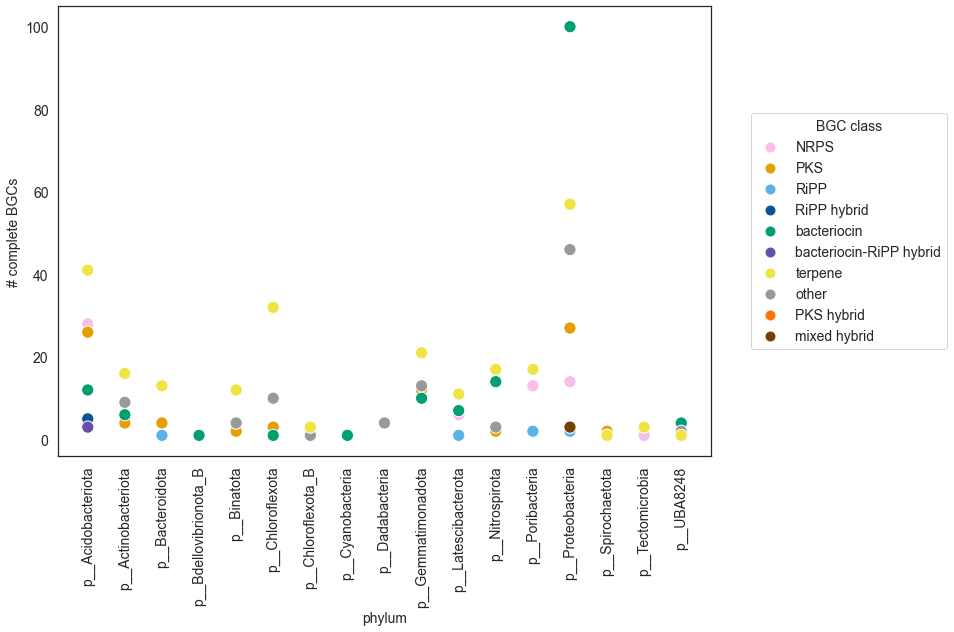

In [60]:
seaborn.set_theme(style='white')
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
i = seaborn.scatterplot(x="phylum", y="candidate_cluster_kind", hue="product_x", 
                        data=bgcs_per_taxonomy_whole, ax=ax, palette=color_dict,
                       s=150, marker='o')
i.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize=14,
        title='BGC class', title_fontsize=14, markerscale=1.5)
i.set_ylabel("# complete BGCs", fontsize=14)
i.set_xlabel("phylum", fontsize=14)
i.tick_params(labelsize=14)

#plt.savefig("/Users/vincentn/Documents/Papers_and_talks/Sponge_paper_2020/bgc_scatterplot_phylum_whole.png", bbox_inches='tight')


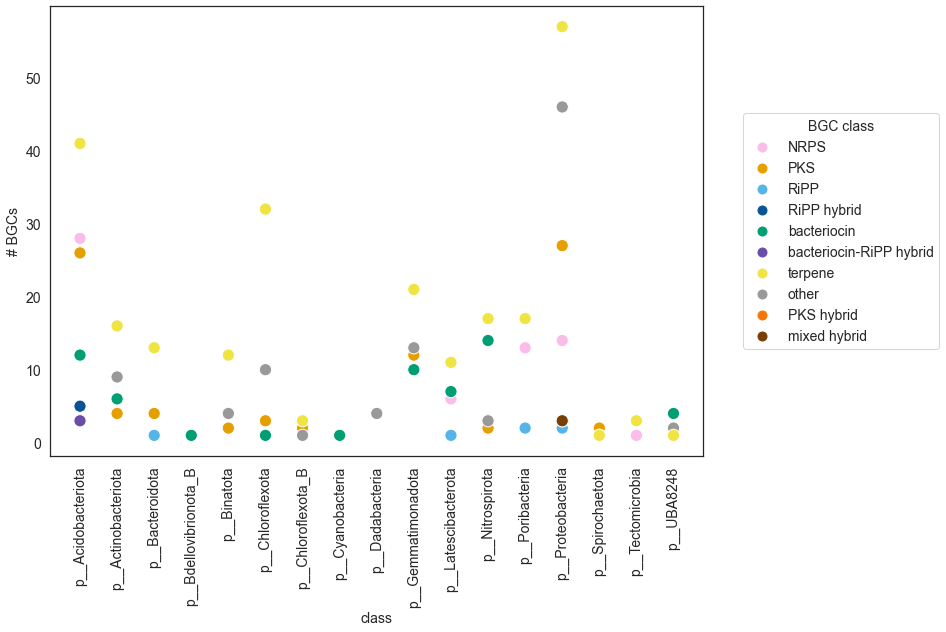

In [57]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
j = seaborn.scatterplot(x="phylum", y="candidate_cluster_kind", hue="product_x", 
                        data=bgcs_per_taxonomy_whole[bgcs_per_taxonomy_whole['candidate_cluster_kind'] <= 60], 
                        ax=ax, palette=color_dict,
                       s=150, marker='o')
j.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize=14,
        title='BGC class', title_fontsize=14, markerscale=1.5)
j.set_ylabel("# BGCs", fontsize=14)
j.set_xlabel("class", fontsize=14)
j.tick_params(labelsize=14)

#plt.savefig("/Users/vincentn/Documents/Papers_and_talks/Sponge_paper_2020/bgc_scatterplot_whole_trunc.png", bbox_inches='tight')


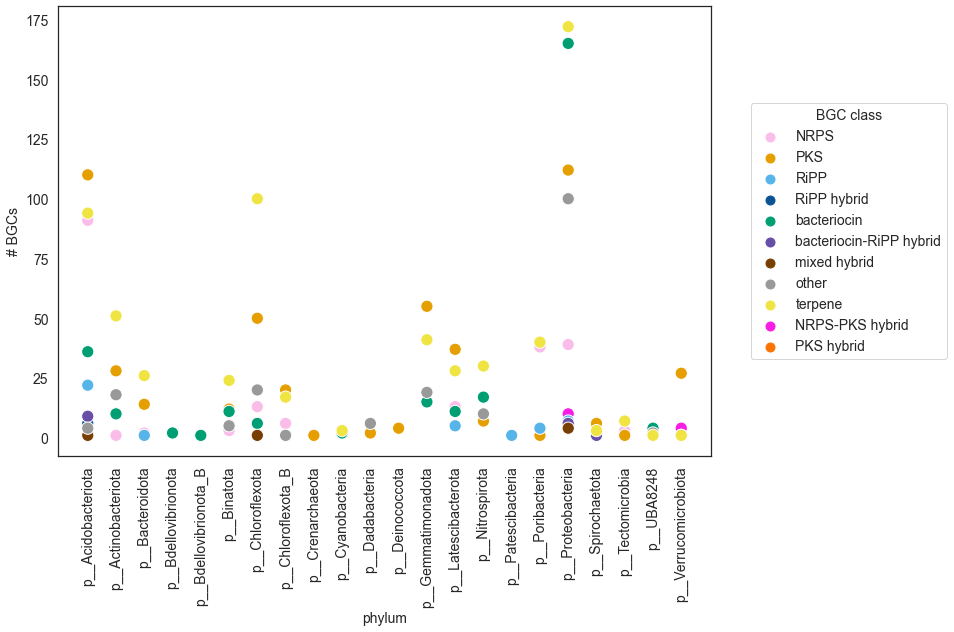

In [61]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
k = seaborn.scatterplot(x="phylum", y="candidate_cluster_kind", hue="product_x", 
                        data=bgcs_per_taxonomy, 
                        ax=ax, palette=color_dict,
                       s=150, marker='o')
k.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1, fontsize=14,
        title='BGC class', title_fontsize=14, markerscale=1.5)
k.set_ylabel("# BGCs", fontsize=14)
k.set_xlabel("phylum", fontsize=14)
k.tick_params(labelsize=14)

#plt.savefig("/Users/vincentn/Documents/Papers_and_talks/Sponge_paper_2020/bgc_scatterplot_phylum.png", bbox_inches='tight')


### At lower than phylum level

In [63]:
new_df_copy_split = new_df_copy[new_df_copy["candidate_cluster_length"].isna() == False]
new_df_copy_split[["kingdom","phylum","class","order","family","genus","species"]] = pd.DataFrame(new_df_copy_split.classification.str.split(";",7, expand=True))
print("At kingdom level: "+str(len(new_df_copy_split[new_df_copy_split["kingdom"] != 'd__'])))
print(len(new_df_copy_split[new_df_copy_split["kingdom"].str.startswith('d')]))
print("At phylum level: "+str(len(new_df_copy_split[new_df_copy_split["phylum"] != 'p__'])))
print(len(new_df_copy_split[new_df_copy_split["phylum"].str.startswith('p')]))
print("At class level: "+str(len(new_df_copy_split[new_df_copy_split["class"] != 'c__'])))
print(len(new_df_copy_split[new_df_copy_split["class"].str.startswith('c')]))
print("At order level: "+str(len(new_df_copy_split[new_df_copy_split["order"] != 'o__'])))
print(len(new_df_copy_split[new_df_copy_split["order"].str.startswith('o')]))
print("At family level: "+str(len(new_df_copy_split[new_df_copy_split["family"] != 'f__'])))
print(len(new_df_copy_split[new_df_copy_split["family"].str.startswith('f')]))
print("At genus level: "+str(len(new_df_copy_split[new_df_copy_split["genus"] != 'g__'])))
print(len(new_df_copy_split[new_df_copy_split["genus"].str.startswith('g')]))
print("At species level: "+str(len(new_df_copy_split[new_df_copy_split["species"] != 's__'])))
print(len(new_df_copy_split[new_df_copy_split["species"].str.startswith('s')]))


At kingdom level: 1898
1898
At phylum level: 1898
1898
At class level: 1867
1898
At order level: 1700
1898
At family level: 1431
1898
At genus level: 771
1898
At species level: 157
1898


/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
# Highest 10 BGC counts by class
new_df_copy_split.groupby(["class"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,class,candidate_cluster_kind
14,c__Gammaproteobacteria,405
4,c__Alphaproteobacteria,214
2,c__Acidobacteriae,159
11,c__Dehalococcoidia,153
15,c__Gemmatimonadetes,130
1,c__Acidimicrobiia,103
34,c__Vicinamibacteria,93
35,c__WGA-4E,83
20,c__Nitrospiria,64
29,c__UBA2968,63


In [65]:
# Highest 10 complete BGC counts by class
new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["class"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,class,candidate_cluster_kind
11,c__Gammaproteobacteria,181
3,c__Alphaproteobacteria,73
12,c__Gemmatimonadetes,56
2,c__Acidobacteriae,52
9,c__Dehalococcoidia,38
13,c__Nitrospiria,36
1,c__Acidimicrobiia,35
25,c__WGA-4E,32
7,c__Binatia,24
23,c__UBA890,23


In [66]:
# Highest 10 BGC counts by order
new_df_copy_split.groupby(["order"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,order,candidate_cluster_kind
0,o__,198
29,o__Pseudomonadales,131
36,o__SG8-23,104
8,o__Bryobacterales,101
71,o__Vicinamibacterales,93
19,o__HK1,88
72,o__WGA-4E,83
21,o__Microtrichales,78
25,o__Nitrospirales,64
53,o__UBA3495,48


In [68]:
# Highest 10 complete BGC counts by class
new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["order"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,order,candidate_cluster_kind
0,o__,68
20,o__Pseudomonadales,62
27,o__SG8-23,43
17,o__Nitrospirales,36
14,o__HK1,33
56,o__WGA-4E,32
6,o__Bryobacterales,32
15,o__Microtrichales,26
53,o__UBA890,23
45,o__UBA6522,19


In [69]:
print(set(new_df_copy_split[new_df_copy_split["order"].isin(["o__Pseudomonadales","o__Bryobacterales","o__SG8-23"])]["phylum"].tolist()))
print(set(new_df_copy_split[new_df_copy_split["order"].isin(["o__Pseudomonadales","o__Bryobacterales","o__SG8-23"])]["sample_x"].tolist()))


{'p__Acidobacteriota', 'p__Proteobacteria', 'p__Gemmatimonadota'}
{'CS202', 'Sarcotragus', '7375', '0977', 'CS783', 'Aplysina', 'CS204', 'CS203', 'CS200', 'CS211', 'MHpat150', 'Petrosia'}


In [56]:
new_df_copy_split.groupby(["family"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,family,candidate_cluster_kind
0,f__,461
32,f__HTCC2089,123
68,f__UBA6623,101
70,f__UBA6960,100
75,f__UBA8438,93
76,f__UBA8639,64
77,f__WGA-3G,61
62,f__UBA3495,46
63,f__UBA4486,46
9,f__Bin61,41


In [57]:
new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["family"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,family,candidate_cluster_kind
0,f__,156
26,f__HTCC2089,60
51,f__UBA6960,41
55,f__UBA8639,36
49,f__UBA6623,32
56,f__WGA-3G,25
47,f__UBA6522,19
6,f__Bin18,17
54,f__UBA8438,17
45,f__UBA4486,16


In [70]:
# Highest 10 BGC counts by genus
new_df_copy_split.groupby(["genus"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,genus,candidate_cluster_kind
0,g__,1127
26,g__Bin94,64
21,g__Bin75,58
18,g__Bin55,42
19,g__Bin61,41
62,g__WGA-3G,39
3,g__BD2-11,32
30,g__Defluviicoccus,26
27,g__Bin95,23
11,g__Bin18,23


In [71]:
# Highest 10 complete BGC counts by genus
new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["genus"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,genus,candidate_cluster_kind
0,g__,380
19,g__Bin75,32
24,g__Bin94,29
16,g__Bin55,23
46,g__WGA-3G,18
10,g__Bin18,17
2,g__BD2-11,11
17,g__Bin61,10
6,g__Bin125,10
18,g__Bin65,10


In [72]:
# Highest 10 BGC counts by species
new_df_copy_split.groupby(["species"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,species,candidate_cluster_kind
0,s__,1741
2,s__BD2-11 sp002238605,10
5,s__Bin107 sp002238965,9
28,s__Defluviicoccus sp002239065,8
23,s__Bin80 sp002238805,8
1,s__Achromobacter sp000633435,8
19,s__Bin61 sp002238705,8
34,s__SP197 sp002238685,7
21,s__Bin75 sp002238765,7
10,s__Bin18 sp002238415,6


In [73]:
# Highest 10 complete BGC counts by species
new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["species"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)


,species,candidate_cluster_kind
0,s__,602
5,s__Bin107 sp002238965,8
1,s__Achromobacter sp000633435,8
9,s__Bin18 sp002238415,6
16,s__Bin61 sp002238705,6
24,s__Defluviicoccus sp002239065,5
18,s__Bin75 sp002238765,5
2,s__BD2-11 sp002238605,5
3,s__Bin103 sp002238925,4
25,s__SP197 sp002238685,4


# MAG-level analyses

## dRep MAG clusters

In [74]:
# Clustering dataframe with primary and secondary cluster information for all MAGs
# Note that some MAGs may form a cluster during primary clustering but...
# not in secondary clustering (above 0.95 ANI)

dereplicated_MAGs_df = pd.read_csv('/Users/vincentn/Documents/Sequencing/Sponge_paper_sample_vs_abundance_250820/data_tables/Cdb.csv')
print(len(dereplicated_MAGs_df))
print(len(set(dereplicated_MAGs_df['primary_cluster'].tolist())))
print(len(set(dereplicated_MAGs_df['secondary_cluster'].tolist())))

643
404
510


In [75]:
# Overall summary of the final 510 MAGs
dereplicated_MAGs_df2 = pd.read_csv('/Users/vincentn/Documents/Sequencing/Sponge_paper_sample_vs_abundance_250820/data_tables/Widb.csv')


In [76]:
# These are the best genomes out of a species cluster
dereplicated_MAGs_df2[dereplicated_MAGs_df2['closest_cluster_member'].isna() == False]

,genome,score,completeness,contamination,strain_heterogeneity,size,N50,cluster,taxonomy,tax_confidence,cluster_members,closest_cluster_member,furthest_cluster_member,completeness_metric,contamination_metric
2,CS203_cluster_DBSCAN_round1_2.fasta,88.059917,96.54,2.20,0.00,5450766,109606,3_1,NaN,NaN,2,96.82,96.82,near,low
9,CS783_bin.71.fa.metabat2.fasta,76.087782,95.44,4.40,0.00,5117998,197499,10_1,NaN,NaN,3,97.40,97.29,near,low
18,CS204_cluster_DBSCAN_round4788_120.fasta,66.913824,96.54,6.59,11.11,6279323,152528,16_1,NaN,NaN,3,96.01,95.98,near,medium
21,CS211_bin.19.fa.metabat2.fasta,85.179734,94.99,2.40,0.00,4471454,23959,19_1,NaN,NaN,4,96.62,96.11,near,low
22,CS204_bin.50.fa.metabat2.fasta,90.163371,94.88,1.43,0.00,5536611,73577,20_1,NaN,NaN,4,96.64,96.14,near,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,CS200_bin.69.fa.metabat2.fasta,76.873115,84.90,2.14,33.33,2600422,8312,384_1,NaN,NaN,2,99.05,99.05,substantial,low
498,7375_bin.4.fa.maxbin2.fasta,74.313964,81.70,2.17,75.00,2003650,4709,393_1,NaN,NaN,2,99.53,99.53,substantial,low
499,MHs3_bin.12.fa.maxbin2.fasta,18.288082,77.94,15.01,91.23,3147634,2564,394_1,NaN,NaN,2,98.97,98.97,substantial,very high
500,MHs1_bin.2.fa.maxbin2.fasta,85.831327,88.93,1.28,100.00,1944847,11032,395_1,NaN,NaN,5,99.71,99.68,substantial,low


In [77]:
# Make list of final bins and identify those that were 'lost' during dereplication
final_dRep_bin_list = dereplicated_MAGs_df2['genome'].tolist()
lost_MAGs_df = dereplicated_MAGs_df[dereplicated_MAGs_df['genome'].isin(final_dRep_bin_list) == False]
lost_MAGs_df


,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster
3,CS204_bin.100.fa.metabat2.fasta,3_1,0.05,average,ANImf,3
10,CS200_bin.80.fa.metabat2.fasta,10_1,0.05,average,ANImf,10
11,CS202_cluster_DBSCAN_round3551_34.fasta,10_1,0.05,average,ANImf,10
21,CS200_bin.90.fa.metabat2.fasta,16_1,0.05,average,ANImf,16
23,CS783_cluster_DBSCAN_round3529_207.fasta,16_1,0.05,average,ANImf,16
...,...,...,...,...,...,...
628,7375_bin.2.fa.maxbin2.fasta,395_1,0.05,average,ANImf,395
630,MHs2_bin.46.fa.metabat2.fasta,395_1,0.05,average,ANImf,395
631,MHs3_bin.5.fa.maxbin2.fasta,395_1,0.05,average,ANImf,395
632,MHs5_bin.4.fa.maxbin2.fasta,395_1,0.05,average,ANImf,395


In [78]:
# Identify secondary clusters with the most MAGs 'lost'
lost_MAGs_df['secondary_cluster'].value_counts().head(12)

353_1    4
60_1     4
395_1    4
63_1     4
168_1    3
191_1    3
362_1    3
193_1    3
20_1     3
19_1     3
296_1    2
10_1     2
Name: secondary_cluster, dtype: int64

In [79]:
# Make dataframe with the 10 highest losses and merge with BGC dataframe
top_10_index_list = lost_MAGs_df['secondary_cluster'].value_counts().head(10).index.tolist()
top_10_df = dereplicated_MAGs_df[dereplicated_MAGs_df['secondary_cluster'].isin(top_10_index_list) == True]

new_df_copy_for_merge = new_df_copy.copy()
new_df_copy_for_merge['bin_id'] = new_df_copy_for_merge['sample_x']+'_'+new_df_copy_for_merge['bin']+'.fasta'

final_top_10_df = pd.merge(top_10_df, new_df_copy_for_merge, left_on='genome', right_on='bin_id', how='left')


In [80]:
set(final_top_10_df['phylum'].tolist())

{nan,
 'p__Acidobacteriota',
 'p__Actinobacteriota',
 'p__Latescibacterota',
 'p__Poribacteria',
 'p__Proteobacteria'}

In [81]:
final_top_10_df.groupby(['bin_id','phylum']).size().reset_index()['phylum'].value_counts()

p__Proteobacteria      14
p__Poribacteria         8
p__Latescibacterota     8
p__Actinobacteriota     7
p__Acidobacteriota      5
Name: phylum, dtype: int64

In [82]:
tmp = final_top_10_df.groupby(['bin_id','secondary_cluster','classification']).size().reset_index().sort_values('secondary_cluster')
tmp.groupby(['secondary_cluster','classification'])['classification'].size()

secondary_cluster  classification                                                                                                   
168_1              d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__GCA-2691085;f__;g__;s__                                      1
                   d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__GCA-2691085;f__GCA-2691085;g__;s__                           3
191_1              d__Bacteria;p__Latescibacterota;c__UBA2968;o__UBA2968;f__GCA-2709665;g__;s__                                         4
193_1              d__Bacteria;p__Latescibacterota;c__UBA2968;o__UBA2968;f__;g__;s__                                                    4
19_1               d__Bacteria;p__Poribacteria;c__WGA-4E;o__WGA-4E;f__;g__;s__                                                          4
20_1               d__Bacteria;p__Poribacteria;c__WGA-4E;o__WGA-4E;f__;g__;s__                                                          3
                   d__Bacteria;p__Porib

In [83]:
# Investigate individual dRep 'species' clusters
# All MH samples -> Acidobacterium
# final_top_10_df[final_top_10_df['secondary_cluster'] == '353_1']
# All MH samples -> Proteobacterium
# final_top_10_df[final_top_10_df['secondary_cluster'] == '60_1']
# All MH samples -> Actinobacterium
# final_top_10_df[final_top_10_df['secondary_cluster'] == '395_1']
# All MH samples -> Proteobacterium
# final_top_10_df[final_top_10_df['secondary_cluster'] == '63_1']
# All MH samples -> Proteobacterium
# final_top_10_df[final_top_10_df['secondary_cluster'] == '168_1']

# CS200, CS202, CS204, CS783 -> Latescibacterota with different number of BGCs
# final_top_10_df[final_top_10_df['secondary_cluster'] == '191_1']
# CS200, CS203, CS204, CS783 -> Actinobacterium with one more BGC in CS204
# final_top_10_df[final_top_10_df['secondary_cluster'] == '362_1']
# CS200, CS203, CS211, CS783 -> Latescibacterota with very different number of BGCs, biggest contig in CS200
# final_top_10_df[final_top_10_df['secondary_cluster'] == '193_1']
# CS203, CS204, CS211, CS783 -> Poribacteria with equal number of BGCs
# final_top_10_df[final_top_10_df['secondary_cluster'] == '20_1']
# CS200, CS203, CS211, CS783 -> Poribacteria with equal number of BGCs
# final_top_10_df[final_top_10_df['secondary_cluster'] == '19_1']

final_top_10_df[final_top_10_df['secondary_cluster'] == '193_1'][['genome','phylum','secondary_cluster','product_x','contig_x']]



,genome,phylum,secondary_cluster,product_x,contig_x
103,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,bacteriocin,NODE_1_length_5887685_cov_36.515424
104,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,PKS,NODE_1_length_5887685_cov_36.515424
105,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,terpene,NODE_1_length_5887685_cov_36.515424
106,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,PKS,NODE_1_length_5887685_cov_36.515424
107,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,bacteriocin,NODE_1_length_5887685_cov_36.515424
108,CS200_cluster_DBSCAN_round41_0.fasta,p__Latescibacterota,193_1,bacteriocin,NODE_1_length_5887685_cov_36.515424
109,CS203_bin.41.fa.maxbin2.fasta,p__Latescibacterota,193_1,RiPP,NODE_4082_length_16306_cov_4.551456
110,CS211_cluster_DBSCAN_round1_14.fasta,p__Latescibacterota,193_1,terpene,NODE_19750_length_5068_cov_2.693584
111,CS783_bin.15.fa.maxbin2.fasta,p__Latescibacterota,193_1,terpene,NODE_11027_length_5422_cov_5.907460
112,CS783_bin.15.fa.maxbin2.fasta,p__Latescibacterota,193_1,bacteriocin,NODE_3022_length_14813_cov_4.303486


In [77]:
# pd.set_option('display.max_colwidth', None)
# final_top_10_df[final_top_10_df['secondary_cluster'] == '193_1'][['genome','classification']]


## MAGs with the most BGCs


### Most BGCs realtive to genome size

In [53]:
# Make dataframe that contains cumulative length of all BGCs in a MAG and BGC % of genome
most_BGC_length_df = new_df_copy.groupby(["bin","sample_x",'phylum'], as_index=False)["length"].sum()
most_BGC_length_df['genome'] = most_BGC_length_df['sample_x']+'_'+most_BGC_length_df['bin']+'.fasta'
# Import genome stats from dRep output including size of genome and merge
all_643_MAGs_stats_df = pd.read_csv('/Users/vincentn/Documents/Sequencing/Sponge_paper_sample_vs_abundance_250820/data_tables/genomeInformation.csv')
final_most_BGC_length_df = pd.merge(most_BGC_length_df, all_643_MAGs_stats_df, on='genome', how='left')
# Calculate BGC % of genome
final_most_BGC_length_df['BGC %'] = final_most_BGC_length_df['length_x']/final_most_BGC_length_df['length_y']
final_most_BGC_length_df.sort_values('BGC %', ascending=False).head(10)


,bin,sample_x,phylum,length_x,genome,completeness,contamination,strain_heterogeneity,length_y,N50,BGC %
333,bin.68.fa.metabat2,CS203,p__Nitrospirota,235385,CS203_bin.68.fa.metabat2.fasta,96.82,3.86,20.00,2591744,166925,0.090821
241,bin.46.fa.metabat2,CS204,p__Nitrospirota,201895,CS204_bin.46.fa.metabat2.fasta,95.91,3.86,0.00,2421414,106262,0.083379
292,bin.56.fa.metabat2,MHs2,p__Verrucomicrobiota,183525,MHs2_bin.56.fa.metabat2.fasta,92.36,0.72,0.00,2278143,9712,0.080559
13,bin.10.fa.metabat2,MHpat150,p__Verrucomicrobiota,184372,MHpat150_bin.10.fa.metabat2.fasta,94.59,0.68,0.00,2316637,13378,0.079586
465,cluster_DBSCAN_round2_1,Petrosia,p__Acidobacteriota,279919,Petrosia_cluster_DBSCAN_round2_1.fasta,89.69,0.85,0.00,3685501,133166,0.075951
61,bin.13.fa.maxbin2,MHs3,p__Verrucomicrobiota,224946,MHs3_bin.13.fa.maxbin2.fasta,96.11,2.61,0.00,3382921,10273,0.066495
198,bin.38.fa.metabat2,CS204,p__Proteobacteria,105555,CS204_bin.38.fa.metabat2.fasta,79.23,1.15,14.29,1668710,64910,0.063255
381,bin.81.fa.metabat2,CS211,p__Chloroflexota,126126,CS211_bin.81.fa.metabat2.fasta,95.31,0.00,0.00,2114646,37309,0.059644
20,bin.102.fa.metabat2,Aplysina,p__Nitrospirota,180813,Aplysina_bin.102.fa.metabat2.fasta,95.00,1.82,0.00,3033590,33075,0.059604
90,bin.16.fa.metabat2,MHpat150,p__Proteobacteria,238829,MHpat150_bin.16.fa.metabat2.fasta,87.54,3.90,0.00,4052643,1168469,0.058932


In [57]:
final_most_BGC_length_df.groupby('phylum')['BGC %'].mean().sort_values(ascending=False)

phylum
p__Verrucomicrobiota     0.047790
p__Nitrospirota          0.043992
p__Acidobacteriota       0.025129
p__UBA8248               0.023336
p__Dadabacteria          0.023187
p__Gemmatimonadota       0.022374
p__Bacteroidota          0.021940
p__Bdellovibrionota_B    0.020426
p__Binatota              0.019498
p__Proteobacteria        0.018149
p__Chloroflexota_B       0.016889
p__Spirochaetota         0.016341
p__Latescibacterota      0.015456
p__Chloroflexota         0.013415
p__Cyanobacteria         0.012928
p__Tectomicrobia         0.012505
p__Deinococcota          0.011630
p__Actinobacteriota      0.011503
p__Poribacteria          0.009500
p__Crenarchaeota         0.006808
p__Bdellovibrionota      0.003761
p__Patescibacteria       0.003644
Name: BGC %, dtype: float64

In [85]:
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS203") & (new_df_copy_split["bin"] == "bin.68.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS204") & (new_df_copy_split["bin"] == "bin.46.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs2") & (new_df_copy_split["bin"] == "bin.56.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.10.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "Petrosia") & (new_df_copy_split["bin"] == "cluster_DBSCAN_round2_1")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs3") & (new_df_copy_split["bin"] == "bin.13.fa.maxbin2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS204") & (new_df_copy_split["bin"] == "bin.38.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS211") & (new_df_copy_split["bin"] == "bin.81.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "Aplysina") & (new_df_copy_split["bin"] == "bin.102.fa.metabat2")]["classification"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.16.fa.metabat2")]["classification"].tolist()))


{'d__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__UBA8639;g__Bin75;s__'}
{'d__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__UBA8639;g__Bin75;s__'}
{'d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__;f__;g__;s__'}
{'d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__;f__;g__;s__'}
{'d__Bacteria;p__Acidobacteriota;c__Bin61;o__Bin61;f__Bin61;g__Bin61;s__Bin61 sp002238705'}
{'d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__;f__;g__;s__'}
{'d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Porisulfidales;f__Porisulfidaceae;g__Porisulfidus;s__'}
{'d__Bacteria;p__Chloroflexota;c__Dehalococcoidia;o__UBA2985;f__UBA2985;g__;s__'}
{'d__Bacteria;p__Nitrospirota;c__Nitrospiria;o__Nitrospirales;f__UBA8639;g__Bin75;s__Bin75 sp002238765'}
{'d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__UBA4486;f__UBA4486;g__;s__'}


In [89]:
top10_most_BGC_length_df = final_most_BGC_length_df.sort_values('BGC %', ascending=False).head(10)
most_BGC_length_df_info = pd.merge(top10_most_BGC_length_df, new_df_copy, on=['bin','sample_x'])
print(len(most_BGC_length_df_info[most_BGC_length_df_info['product_x'].isna() == True]))
most_BGC_length_df_info[['genome','length_x','length_y','N50','BGC %','product_x','class','phylum','contig_x']]
most_BGC_length_df_info.groupby('genome')['product_x'].value_counts()


0


genome                                  product_x      
Aplysina_bin.102.fa.metabat2.fasta      terpene             3
                                        PKS                 2
                                        bacteriocin         1
                                        other               1
CS203_bin.68.fa.metabat2.fasta          terpene             4
                                        PKS                 2
                                        bacteriocin         2
                                        other               1
CS204_bin.38.fa.metabat2.fasta          PKS                 1
                                        bacteriocin         1
                                        other               1
                                        terpene             1
CS204_bin.46.fa.metabat2.fasta          terpene             3
                                        PKS                 2
                                        bacteriocin         1
              

In [90]:
most_BGC_length_df_info_genome_list = most_BGC_length_df_info['genome'].tolist()
dereplicated_MAGs_df[dereplicated_MAGs_df['genome'].isin(most_BGC_length_df_info_genome_list)]

,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster
52,MHpat150_bin.10.fa.metabat2.fasta,36_1,0.05,average,ANImf,36
53,MHs2_bin.56.fa.metabat2.fasta,36_1,0.05,average,ANImf,36
54,MHs3_bin.13.fa.maxbin2.fasta,36_1,0.05,average,ANImf,36
168,CS211_bin.81.fa.metabat2.fasta,117_0,0.05,average,ANImf,117
276,MHpat150_bin.16.fa.metabat2.fasta,180_0,0.05,average,ANImf,180
357,Aplysina_bin.102.fa.metabat2.fasta,219_0,0.05,average,ANImf,219
359,CS203_bin.68.fa.metabat2.fasta,221_1,0.05,average,ANImf,221
360,CS204_bin.46.fa.metabat2.fasta,221_2,0.05,average,ANImf,221
379,CS204_bin.38.fa.metabat2.fasta,233_2,0.05,average,ANImf,233
549,Petrosia_cluster_DBSCAN_round2_1.fasta,348_1,0.05,average,ANImf,348


In [91]:
most_BGC_length_df_info_dRep_cluster_list = dereplicated_MAGs_df[dereplicated_MAGs_df['genome'].isin(most_BGC_length_df_info_genome_list)]['secondary_cluster'].tolist()
dereplicated_MAGs_df[dereplicated_MAGs_df['secondary_cluster'].isin(most_BGC_length_df_info_dRep_cluster_list)]


,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster
52,MHpat150_bin.10.fa.metabat2.fasta,36_1,0.05,average,ANImf,36
53,MHs2_bin.56.fa.metabat2.fasta,36_1,0.05,average,ANImf,36
54,MHs3_bin.13.fa.maxbin2.fasta,36_1,0.05,average,ANImf,36
168,CS211_bin.81.fa.metabat2.fasta,117_0,0.05,average,ANImf,117
276,MHpat150_bin.16.fa.metabat2.fasta,180_0,0.05,average,ANImf,180
357,Aplysina_bin.102.fa.metabat2.fasta,219_0,0.05,average,ANImf,219
359,CS203_bin.68.fa.metabat2.fasta,221_1,0.05,average,ANImf,221
360,CS204_bin.46.fa.metabat2.fasta,221_2,0.05,average,ANImf,221
379,CS204_bin.38.fa.metabat2.fasta,233_2,0.05,average,ANImf,233
548,Aplysina_cluster_DBSCAN_round39_1.fasta,348_1,0.05,average,ANImf,348


### By number of BGCs

In [92]:
# Note that number 11 in ranking conveniently has 9 BGCs
top_10_BGC_count_df = new_df_copy_split.groupby(["bin","sample_x"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)
top_10_BGC_count_df


,bin,sample_x,candidate_cluster_kind
292,bin.56.fa.metabat2,MHs2,13
172,bin.31.fa.metabat2,Aplysina,12
475,cluster_DBSCAN_round2_5,0977,11
63,bin.13.fa.metabat2,CS211,11
329,bin.67.fa.metabat2,CS204,11
132,bin.24.fa.maxbin2,MHpat150,10
140,bin.26.fa.metabat2,MHpat150,10
61,bin.13.fa.maxbin2,MHs3,10
325,bin.66.fa.metabat2,7375,10
486,cluster_DBSCAN_round3758_6,Aplysina,10


In [93]:
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs2") & (new_df_copy_split["bin"] == "bin.56.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "Aplysina") & (new_df_copy_split["bin"] == "bin.31.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "0977") & (new_df_copy_split["bin"] == "cluster_DBSCAN_round2_5")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS211") & (new_df_copy_split["bin"] == "bin.13.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS204") & (new_df_copy_split["bin"] == "bin.67.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "7375") & (new_df_copy_split["bin"] == "bin.66.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.24.fa.maxbin2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.26.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs3") & (new_df_copy_split["bin"] == "bin.13.fa.maxbin2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "Aplysina") & (new_df_copy_split["bin"] == "bin.13.fa.metabat2")]["phylum"].tolist()))


{'p__Verrucomicrobiota'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Acidobacteriota'}
{'p__Acidobacteriota'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Verrucomicrobiota'}
{'p__Deinococcota'}


### By number of complete BGCs

In [94]:
top_10_complete_BGC_count_df = new_df_copy_split[new_df_copy_split["on_contig_edge_x"] == 'False'].groupby(["bin","sample_x"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(10)
top_10_complete_BGC_count_df


,bin,sample_x,candidate_cluster_kind
259,cluster_DBSCAN_round2_2,MHs2,8
50,bin.16.fa.metabat2,7375,8
185,bin.68.fa.metabat2,CS203,8
52,bin.16.fa.metabat2,MHpat150,8
101,bin.33.fa.metabat2,0977,7
183,bin.66.fa.metabat2,7375,7
65,bin.2.fa.metabat2,MHs5,7
199,bin.72.fa.metabat2,CS200,7
231,bin.97.fa.metabat2,Aplysina,6
27,bin.12.fa.maxbin2,CS200,6


In [95]:
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "7375") & (new_df_copy_split["bin"] == "bin.16.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.16.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs2") & (new_df_copy_split["bin"] == "cluster_DBSCAN_round2_2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS203") & (new_df_copy_split["bin"] == "bin.68.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "0977") & (new_df_copy_split["bin"] == "bin.33.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHs5") & (new_df_copy_split["bin"] == "bin.2.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "7375") & (new_df_copy_split["bin"] == "bin.66.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "CS200") & (new_df_copy_split["bin"] == "bin.72.fa.metabat2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "cluster_DBSCAN_round4_2")]["phylum"].tolist()))
print(set(new_df_copy_split[(new_df_copy_split["sample_x"] == "MHpat150") & (new_df_copy_split["bin"] == "bin.15.fa.maxbin2")]["phylum"].tolist()))


{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Nitrospirota'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}
{'p__Binatota'}
{'p__Proteobacteria'}
{'p__Proteobacteria'}


## 10 most abundant MAGs per sample

In [96]:
# list ten_most_abundant_MAGs_per_sample taken from Sample_vs_abundance_table_131022
ten_most_abundant_MAGs_per_sample = []
with open('/Users/vincentn/Documents/Sequencing/Sponge_paper_sample_vs_abundance_250820/ten_most_abundant_MAGs_per_sample.txt') as f:
    #ten_most_abundant_MAGs_per_sample = f.read()
    for line in f:
        # Remove linebreak which is the last character of the string
        curr_place = line[:-1]
        # Add item to the list
        ten_most_abundant_MAGs_per_sample.append(curr_place)    

print(len(ten_most_abundant_MAGs_per_sample))


160


In [98]:
# What BGCs are found in the 10 most abundant MAGs per sample?
new_df_copy_for_merge = new_df_copy.copy()
new_df_copy_for_merge['bin_id'] = new_df_copy_for_merge['sample_x']+'_'+new_df_copy_for_merge['bin']
ten_most_abundant_MAGs_per_sample_df = new_df_copy_for_merge[new_df_copy_for_merge['bin_id'].isin(ten_most_abundant_MAGs_per_sample) == True]
print(len(set(ten_most_abundant_MAGs_per_sample_df['bin_id'].tolist())))
ten_most_abundant_MAGs_per_sample_df['product_x'].value_counts()


91


terpene                    108
PKS                         83
bacteriocin                 48
NRPS                        33
other                       31
RiPP                         8
bacteriocin-RiPP hybrid      4
NRPS-PKS hybrid              3
RiPP hybrid                  1
mixed hybrid                 1
Name: product_x, dtype: int64

In [100]:
# Make a list of the top 25 MAGs with the highest BGC % and see if they are abundant
top25_most_BGC_length_list = final_most_BGC_length_df.sort_values('BGC %', ascending=False).head(25)['genome'].str.split('.fasta', expand=True)[0].tolist()
ten_most_abundant_MAGs_per_sample_df[ten_most_abundant_MAGs_per_sample_df['bin_id'].isin(top25_most_BGC_length_list) == True]


,sample_x,product_x,on_contig_edge_x,length,contig_x,unique_id,Unnamed: 0,bin,contig_y,contig_length,...,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings,class,sample_y,phylum,bin_id
86,CS203,terpene,True,21350,NODE_860_length_54447_cov_9.613568,CS20386021350,7377.0,bin.72.fa.metabat2,NODE_860_length_54447_cov_9.613568,54447.0,...,NaN,NaN,93.73,11.0,0.533345,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.72.fa.metabat2
105,CS203,NRPS,False,42697,NODE_215_length_115002_cov_10.513889,CS20321542697,7363.0,bin.72.fa.metabat2,NODE_215_length_115002_cov_10.513889,115002.0,...,NaN,NaN,93.73,11.0,0.533345,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.72.fa.metabat2
225,0977,other,True,27166,NODE_984_length_50214_cov_123.243057,097798427166,3701.0,bin.1.fa.maxbin2,NODE_984_length_50214_cov_123.243057,50214.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
253,CS203,terpene,False,21914,NODE_18_length_301139_cov_8.935421,CS2031821914,7349.0,bin.72.fa.metabat2,NODE_18_length_301139_cov_8.935421,301139.0,...,NaN,NaN,93.73,11.0,0.533345,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.72.fa.metabat2
286,0977,terpene,False,21041,NODE_84_length_236389_cov_122.999069,09778421041,3689.0,bin.1.fa.maxbin2,NODE_84_length_236389_cov_122.999069,236389.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
314,0977,terpene,False,23390,NODE_122_length_199828_cov_127.240049,097712223390,3690.0,bin.1.fa.maxbin2,NODE_122_length_199828_cov_127.240049,199828.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
420,MHpat150,PKS,True,28502,NODE_474_length_28502_cov_18.417163,MHpat15047428502,6255.0,bin.10.fa.metabat2,NODE_474_length_28502_cov_18.417163,28502.0,...,NaN,NaN,91.25,11.0,0.579144,NaN,c__Kiritimatiellae,MHpat150,p__Verrucomicrobiota,MHpat150_bin.10.fa.metabat2
723,0977,bacteriocin,True,5338,NODE_27_length_396205_cov_140.164114,0977275338,3687.0,bin.1.fa.maxbin2,NODE_27_length_396205_cov_140.164114,396205.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
878,0977,bacteriocin,False,9418,NODE_27_length_396205_cov_140.164114,0977279418,3686.0,bin.1.fa.maxbin2,NODE_27_length_396205_cov_140.164114,396205.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
935,CS203,bacteriocin,False,10861,NODE_495_length_76126_cov_9.373610,CS20349510861,7370.0,bin.72.fa.metabat2,NODE_495_length_76126_cov_9.373610,76126.0,...,NaN,NaN,93.73,11.0,0.533345,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.72.fa.metabat2


In [101]:
# Is there overlap between 10 highest BGC % by sample and 10 most abundant MAGs
# Length < 160 in top_10_BGC_length_by_sample_df due to samples with low number of MAGs and no BGCs associated with them
# Confirmed as samples <10 are MHs2, MHs1, MHs5
top_10_BGC_length_by_sample_df = final_most_BGC_length_df.sort_values("BGC %", ascending=False).groupby("sample_x").head(10).sort_values("sample_x")
print(len(top_10_BGC_length_by_sample_df))
# top_10_BGC_length_by_sample_df.value_counts('sample_x')

# Take .fasta out of 'genome' and cross-reference to most abundant MAGs 
top_10_BGC_length_by_sample_df['genome'] = top_10_BGC_length_by_sample_df['genome'].str.split('.fasta', expand=True)[0]
top_10_overlap_df = top_10_BGC_length_by_sample_df[top_10_BGC_length_by_sample_df['genome'].isin(ten_most_abundant_MAGs_per_sample) == True]
print(len(set(top_10_overlap_df['sample_x'].tolist())))
print(set(top_10_overlap_df['sample_x'].tolist()))
print(len(top_10_overlap_df))

# Merge to obtain taxonomy of these MAGs
new_df_copy_for_merge = new_df_copy[['sample_x','bin','classification','class','phylum']]
new_df_copy_for_merge = new_df_copy_for_merge[new_df_copy_for_merge['bin'].isna() == False]
new_df_copy_for_merge['genome'] = new_df_copy_for_merge['sample_x']+'_'+new_df_copy_for_merge['bin']
# For some reason this merge produces a df with 180 rows but only 36 are unique?
final_top_10_overlap_df = pd.merge(top_10_overlap_df, new_df_copy_for_merge, on='genome', how='inner')
print(len(final_top_10_overlap_df))
final_top_10_overlap_df = final_top_10_overlap_df.drop_duplicates(subset='genome')
print(len(final_top_10_overlap_df))
final_top_10_overlap_df


147
14
{'CS202', 'Sarcotragus', '0977', 'MHs1', 'CS783', 'MHs5', 'CS211', 'Aplysina', 'CS203', 'Petrosia', 'MHs3', '7375', 'MHpat150', 'CS200'}
36
182
36


,bin_x,sample_x_x,length_x,genome,completeness,contamination,strain_heterogeneity,length_y,N50,BGC %,sample_x_y,bin_y,classification,class,phylum
0,bin.15.fa.maxbin2,0977,90114,0977_bin.15.fa.maxbin2,75.69,0.62,0.00,2592922,132714,0.034754,0977,bin.15.fa.maxbin2,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,c__Gammaproteobacteria,p__Proteobacteria
4,bin.101.fa.metabat2,0977,110230,0977_bin.101.fa.metabat2,97.01,1.28,0.00,3376379,2060971,0.032647,0977,bin.101.fa.metabat2,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,c__Acidimicrobiia,p__Actinobacteriota
7,bin.1.fa.maxbin2,0977,132470,0977_bin.1.fa.maxbin2,95.85,1.82,0.00,2455627,179970,0.053945,0977,bin.1.fa.maxbin2,d__Bacteria;p__Nitrospirota;c__Nitrospiria;o__...,c__Nitrospiria,p__Nitrospirota
15,bin.130.fa.metabat2,0977,136650,0977_bin.130.fa.metabat2,94.87,1.71,0.00,4986952,103815,0.027402,0977,bin.130.fa.metabat2,d__Bacteria;p__Acidobacteriota;c__Thermoanaero...,c__Thermoanaerobaculia,p__Acidobacteriota
20,bin.26.fa.metabat2,7375,106698,7375_bin.26.fa.metabat2,97.33,0.44,85.71,4456891,120903,0.023940,7375,bin.26.fa.metabat2,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,c__Gammaproteobacteria,p__Proteobacteria
24,bin.4.fa.maxbin2,7375,20569,7375_bin.4.fa.maxbin2,81.70,2.17,75.00,2003650,4709,0.010266,7375,bin.4.fa.maxbin2,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,c__Cyanobacteriia,p__Cyanobacteria
26,cluster_DBSCAN_round3758_93,Aplysina,128278,Aplysina_cluster_DBSCAN_round3758_93,97.74,3.30,0.00,3626319,169881,0.035374,Aplysina,cluster_DBSCAN_round3758_93,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonad...,c__Gemmatimonadetes,p__Gemmatimonadota
30,bin.24.fa.metabat2,CS200,252763,CS200_bin.24.fa.metabat2,97.19,17.03,65.00,6781728,392251,0.037271,CS200,bin.24.fa.metabat2,d__Bacteria;p__Latescibacterota;c__UBA2968;o__...,c__UBA2968,p__Latescibacterota
37,bin.44.fa.metabat2,CS200,213875,CS200_bin.44.fa.metabat2,94.23,0.85,0.00,6170844,48214,0.034659,CS200,bin.44.fa.metabat2,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,c__Acidobacteriae,p__Acidobacteriota
45,bin.5.fa.maxbin2,CS202,173859,CS202_bin.5.fa.maxbin2,92.63,1.88,0.00,5186574,92593,0.033521,CS202,bin.5.fa.maxbin2,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,c__Acidobacteriae,p__Acidobacteriota


In [102]:
final_top_10_overlap_df['phylum'].value_counts()

p__Proteobacteria       9
p__Acidobacteriota      7
p__Gemmatimonadota      7
p__Actinobacteriota     3
p__Bacteroidota         3
p__Nitrospirota         2
p__Dadabacteria         2
p__Cyanobacteria        1
p__Latescibacterota     1
p__Verrucomicrobiota    1
Name: phylum, dtype: int64

In [103]:
# See if any of the MAGs are related at the species level
dereplicated_MAGs_df_for_merge = dereplicated_MAGs_df[['genome','secondary_cluster']]
dereplicated_MAGs_df_for_merge['genome'] = dereplicated_MAGs_df_for_merge['genome'].str.split('.fasta', expand=True)[0]
final_top_10_overlap_df_with_dRep = pd.merge(final_top_10_overlap_df, dereplicated_MAGs_df_for_merge, on='genome')
print(len(final_top_10_overlap_df_with_dRep))
print(len(set(final_top_10_overlap_df_with_dRep['secondary_cluster'].tolist())))
final_top_10_overlap_df_with_dRep


36
36


/var/folders/4q/44sm58cd3d38vh_kwv88hfdr0000gn/T/ipykernel_1538/4294611188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dereplicated_MAGs_df_for_merge['genome'] = dereplicated_MAGs_df_for_merge['genome'].str.split('.fasta', expand=True)[0]


,bin_x,sample_x_x,length_x,genome,completeness,contamination,strain_heterogeneity,length_y,N50,BGC %,sample_x_y,bin_y,classification,class,phylum,secondary_cluster
0,bin.15.fa.maxbin2,0977,90114,0977_bin.15.fa.maxbin2,75.69,0.62,0.00,2592922,132714,0.034754,0977,bin.15.fa.maxbin2,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,c__Gammaproteobacteria,p__Proteobacteria,178_0
1,bin.101.fa.metabat2,0977,110230,0977_bin.101.fa.metabat2,97.01,1.28,0.00,3376379,2060971,0.032647,0977,bin.101.fa.metabat2,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,c__Acidimicrobiia,p__Actinobacteriota,357_2
2,bin.1.fa.maxbin2,0977,132470,0977_bin.1.fa.maxbin2,95.85,1.82,0.00,2455627,179970,0.053945,0977,bin.1.fa.maxbin2,d__Bacteria;p__Nitrospirota;c__Nitrospiria;o__...,c__Nitrospiria,p__Nitrospirota,222_1
3,bin.130.fa.metabat2,0977,136650,0977_bin.130.fa.metabat2,94.87,1.71,0.00,4986952,103815,0.027402,0977,bin.130.fa.metabat2,d__Bacteria;p__Acidobacteriota;c__Thermoanaero...,c__Thermoanaerobaculia,p__Acidobacteriota,306_0
4,bin.26.fa.metabat2,7375,106698,7375_bin.26.fa.metabat2,97.33,0.44,85.71,4456891,120903,0.023940,7375,bin.26.fa.metabat2,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,c__Gammaproteobacteria,p__Proteobacteria,81_1
5,bin.4.fa.maxbin2,7375,20569,7375_bin.4.fa.maxbin2,81.70,2.17,75.00,2003650,4709,0.010266,7375,bin.4.fa.maxbin2,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,c__Cyanobacteriia,p__Cyanobacteria,393_1
6,cluster_DBSCAN_round3758_93,Aplysina,128278,Aplysina_cluster_DBSCAN_round3758_93,97.74,3.30,0.00,3626319,169881,0.035374,Aplysina,cluster_DBSCAN_round3758_93,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonad...,c__Gemmatimonadetes,p__Gemmatimonadota,330_1
7,bin.24.fa.metabat2,CS200,252763,CS200_bin.24.fa.metabat2,97.19,17.03,65.00,6781728,392251,0.037271,CS200,bin.24.fa.metabat2,d__Bacteria;p__Latescibacterota;c__UBA2968;o__...,c__UBA2968,p__Latescibacterota,171_1
8,bin.44.fa.metabat2,CS200,213875,CS200_bin.44.fa.metabat2,94.23,0.85,0.00,6170844,48214,0.034659,CS200,bin.44.fa.metabat2,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,c__Acidobacteriae,p__Acidobacteriota,298_1
9,bin.5.fa.maxbin2,CS202,173859,CS202_bin.5.fa.maxbin2,92.63,1.88,0.00,5186574,92593,0.033521,CS202,bin.5.fa.maxbin2,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,c__Acidobacteriae,p__Acidobacteriota,301_0


Text(0.5, 0, 'sample')

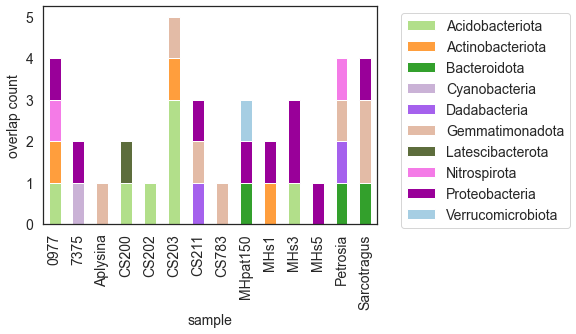

In [104]:
# Make a dataframe and plot the number of overlaps per sample
# Note that color_map is only used below in iTOL figure
final_top_10_overlap__plot_df = final_top_10_overlap_df.groupby('sample_x_x')['phylum'].value_counts().reset_index(name='count')
final_top_10_overlap__plot_df = final_top_10_overlap__plot_df.rename(columns={'sample_x_x':'sample'})
final_top_10_overlap__plot_df['phylum'] = final_top_10_overlap__plot_df['phylum'].str.split('p__', expand=True)[1]

# Need to use alphabetically-ordered hex-codes or make colormap object
seaborn.set_theme(style='white')
final_top_10_overlap__plot_df.pivot(index='sample', columns='phylum').plot(kind='bar', 
                stacked=True, y='count',
                color=['#b2df8a','#ff9e3d','#33a02c','#cab2d6','#a561ed','#e3bba6',
                    '#5d6d3c','#F47BE7','#990099','#a6cee3'], fontsize=14)

#plt.rcParams["figure.figsize"] = (1,10)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)
plt.ylabel('overlap count', fontsize=14)
plt.xlabel('sample', fontsize=14)
# plt.savefig('/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/final_top_10_overlap_plot.pdf', bbox_inches='tight')

# color_map = {'Proteobacteria':"#990099",
#  'Acidobacteriota':"#b2df8a",
#  'Actinobacteriota':"#ff9e3d",
#  'Bacteroidota':"#33a02c",
#  'Binatota':"#a02c33",
#  'Bdellovibrionota':"#006633",
#  'Bdellovibrionota_B':"#a46502",
#  'Chloroflexota':"#e3a6c9",
#  'Chloroflexota_B':'#02437f',
#  'Crenarchaeota':'#009999',
#  'Cyanobacteria':"#cab2d6",
#  'Dadabacteria':"#a561ed",
#  'Deinococcota':"#1f78b4",
#  'Gemmatimonadota':'#e3bba6',
#  'Latescibacterota':'#5d6d3c',
#  'Nitrospirota':"#F47BE7",
#  'Patescibacteria':"#dcdc23", 
#  'Poribacteria':"#e84f51",
#  'Spirochaetota':"#fb9a99",
#  'Tectomicrobia':"#000000",
#  'Verrucomicrobiota':'#a6cee3',
#  'UBA8248':"#9c9c9c"}


In [105]:
# Check top 10 in terms of number of BGCs
top_10_BGC_count_df_tmp = top_10_BGC_count_df.copy()
top_10_BGC_count_df_tmp['bin_id'] = top_10_BGC_count_df_tmp['sample_x']+'_'+top_10_BGC_count_df_tmp['bin']
top_10_BGC_count_df_list = top_10_BGC_count_df_tmp['bin_id'].tolist()
ten_most_abundant_MAGs_per_sample_df[ten_most_abundant_MAGs_per_sample_df['bin_id'].isin(top_10_BGC_count_df_list) == True]


,sample_x,product_x,on_contig_edge_x,length,contig_x,unique_id,Unnamed: 0,bin,contig_y,contig_length,...,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings,class,sample_y,phylum,bin_id


In [106]:
# Extend to top 25 in terms of number of BGCs
top_25_BGC_count_df_tmp = new_df_copy_split.groupby(["bin","sample_x"], as_index=False)["candidate_cluster_kind"].count().sort_values("candidate_cluster_kind", ascending=False).head(25)
top_25_BGC_count_df_tmp['bin_id'] = top_25_BGC_count_df_tmp['sample_x']+'_'+top_25_BGC_count_df_tmp['bin']
top_25_BGC_count_df_list = top_25_BGC_count_df_tmp['bin_id'].tolist()
ten_most_abundant_MAGs_per_sample_df[ten_most_abundant_MAGs_per_sample_df['bin_id'].isin(top_25_BGC_count_df_list) == True]


,sample_x,product_x,on_contig_edge_x,length,contig_x,unique_id,Unnamed: 0,bin,contig_y,contig_length,...,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings,class,sample_y,phylum,bin_id
151,CS200,terpene,False,21830,NODE_919_length_52636_cov_21.110229,CS20091921830,12222.0,bin.44.fa.metabat2,NODE_919_length_52636_cov_21.110229,52636.0,...,NaN,NaN,89.94,11.0,0.786308,NaN,c__Acidobacteriae,CS200,p__Acidobacteriota,CS200_bin.44.fa.metabat2
225,0977,other,True,27166,NODE_984_length_50214_cov_123.243057,097798427166,3701.0,bin.1.fa.maxbin2,NODE_984_length_50214_cov_123.243057,50214.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
244,CS203,PKS,True,22951,NODE_2696_length_22951_cov_11.024185,CS203269622951,5163.0,bin.90.fa.metabat2,NODE_2696_length_22951_cov_11.024185,22951.0,...,NaN,NaN,90.93,11.0,0.782301,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.90.fa.metabat2
286,0977,terpene,False,21041,NODE_84_length_236389_cov_122.999069,09778421041,3689.0,bin.1.fa.maxbin2,NODE_84_length_236389_cov_122.999069,236389.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
314,0977,terpene,False,23390,NODE_122_length_199828_cov_127.240049,097712223390,3690.0,bin.1.fa.maxbin2,NODE_122_length_199828_cov_127.240049,199828.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
321,MHs5,terpene,False,23050,NODE_19_length_124708_cov_3.112971,MHs51923050,2.0,bin.2.fa.metabat2,NODE_19_length_124708_cov_3.112971,124708.0,...,NaN,NaN,97.36,11.0,0.673689,NaN,c__Gammaproteobacteria,MHs5,p__Proteobacteria,MHs5_bin.2.fa.metabat2
459,CS203,NRPS,True,41526,NODE_587_length_69186_cov_11.241011,CS20358741526,5114.0,bin.90.fa.metabat2,NODE_587_length_69186_cov_11.241011,69186.0,...,NaN,NaN,90.93,11.0,0.782301,NaN,c__Acidobacteriae,CS203,p__Acidobacteriota,CS203_bin.90.fa.metabat2
586,MHs5,NRPS-PKS hybrid,True,40714,NODE_165_length_40969_cov_3.970276,MHs516540714,43.0,bin.2.fa.metabat2,NODE_165_length_40969_cov_3.970276,40969.0,...,NaN,NaN,97.36,11.0,0.673689,NaN,c__Gammaproteobacteria,MHs5,p__Proteobacteria,MHs5_bin.2.fa.metabat2
723,0977,bacteriocin,True,5338,NODE_27_length_396205_cov_140.164114,0977275338,3687.0,bin.1.fa.maxbin2,NODE_27_length_396205_cov_140.164114,396205.0,...,NaN,NaN,92.26,11.0,0.965869,Genome not assigned to closest species as it f...,c__Nitrospiria,0977,p__Nitrospirota,0977_bin.1.fa.maxbin2
749,MHs5,PKS,False,46279,NODE_36_length_90874_cov_3.765535,MHs53646279,8.0,bin.2.fa.metabat2,NODE_36_length_90874_cov_3.765535,90874.0,...,NaN,NaN,97.36,11.0,0.673689,NaN,c__Gammaproteobacteria,MHs5,p__Proteobacteria,MHs5_bin.2.fa.metabat2


# BGC summary dataframe for BGCs per phylum and avg. per MAG

In [110]:
# Sanity check that bgc_df contains all 643 MAGs
print(len(bgc_df.groupby(['sample','bin']).size().reset_index().rename(columns={0:'count'})))
# Make respective summary value counts to be merged
raw_bgcs_by_phylum = bgcs_per_taxonomy.groupby('phylum')['candidate_cluster_kind'].sum().sort_values(ascending=False).to_frame()
raw_bgcs_by_phylum = raw_bgcs_by_phylum.rename(columns={'candidate_cluster_kind':'# BGCs'})
print(raw_bgcs_by_phylum['# BGCs'].sum())
complete_bgcs_per_phylum = bgcs_per_taxonomy_whole.groupby('phylum')['candidate_cluster_kind'].sum().sort_values(ascending=False).to_frame()
complete_bgcs_per_phylum = complete_bgcs_per_phylum.rename(columns={'candidate_cluster_kind':'# complete BGCs'})
print(complete_bgcs_per_phylum['# complete BGCs'].sum())
MAGs_per_phylum = bgc_df.groupby(['sample','bin','phylum']).size().reset_index()['phylum'].value_counts().to_frame()
MAGs_per_phylum = MAGs_per_phylum.rename(columns={'phylum':'# MAGs'})
print(MAGs_per_phylum['# MAGs'].sum())


643
1898
687
643


In [116]:
# Merge the summary dataframes
tmp_merged_df = pd.merge(MAGs_per_phylum, raw_bgcs_by_phylum, how='left', left_index=True, right_index=True)
summary_merged_df = pd.merge(tmp_merged_df , complete_bgcs_per_phylum, how='left', left_index=True, right_index=True)
print(summary_merged_df.sum())
# Calculate summary statistics
summary_merged_df['Avg. BGCs per MAG'] = summary_merged_df['# BGCs']/summary_merged_df['# MAGs']
summary_merged_df['Avg. complete BGCs per MAG'] = summary_merged_df['# complete BGCs']/summary_merged_df['# MAGs']
summary_merged_df = summary_merged_df.round(decimals=2)
summary_merged_df = summary_merged_df.fillna(0)
summary_merged_df.sort_values('Avg. BGCs per MAG', ascending=False)


# MAGs              643.0
# BGCs             1898.0
# complete BGCs     687.0
dtype: float64


,# MAGs,# BGCs,# complete BGCs,Avg. BGCs per MAG,Avg. complete BGCs per MAG
p__Verrucomicrobiota,6,34,0.0,5.67,0.00
p__Acidobacteriota,69,373,118.0,5.41,1.71
p__Nitrospirota,12,64,36.0,5.33,3.00
p__UBA8248,2,9,8.0,4.50,4.00
p__Spirochaetota,4,16,5.0,4.00,1.25
p__Proteobacteria,162,619,254.0,3.82,1.57
p__Binatota,15,55,24.0,3.67,1.60
p__Gemmatimonadota,37,130,56.0,3.51,1.51
p__Latescibacterota,32,94,36.0,2.94,1.12
p__Bacteroidota,16,43,18.0,2.69,1.12


In [117]:
# summary_merged_df.sort_values('Avg. BGCs per MAG', ascending=False).to_csv('/Users/vincentn/Documents/Papers_and_talks/Sponge_paper_2020/BGCs_per_phylum_incl_avg_summary.csv')


# BGCs per MAG summary data for iTOL figure
This creates the a summary of BGCs per MAG as identified in MetaSing and converts it to the comma-separated list format required for visualisation with iTol

In [118]:
set(new_df_copy['product_x'].tolist())

{'NRPS',
 'NRPS-PKS hybrid',
 'PKS',
 'PKS hybrid',
 'RiPP',
 'RiPP hybrid',
 'bacteriocin',
 'bacteriocin-RiPP hybrid',
 'mixed hybrid',
 'other',
 'terpene'}

In [119]:
def SupplementAndConvertCounts(input_list):
    ref_list = ['NRPS','NRPS-PKS hybrid','PKS','PKS hybrid','RiPP','RiPP hybrid',
                'bacteriocin','bacteriocin-RiPP hybrid','mixed hybrid','other','terpene']
    tmp_list = []
    for i in input_list:
        tmp_list.append(i[0])
    missing_list = set(ref_list)-set(tmp_list)
    out_list = []
    for j in missing_list:
        out_list.append((j,0))
    out_list = input_list+out_list
    out_list.sort(key=lambda a: a[0])
    out_str = ''
    for k in out_list:
        out_str = out_str+str(k[1])+','
    #print(out_list)
    
    return(out_str[:-1])

In [120]:
# Summarise and count BGC products types and output as a sequence of strings
bgc_df_MAG_summary = new_df_copy.copy()
bgc_df_MAG_summary['itol_bin_id'] = bgc_df_MAG_summary['sample_x']+'.'+bgc_df_MAG_summary['bin']
bgc_df_MAG_summary['itol_bin_id'] = bgc_df_MAG_summary['itol_bin_id'].str.replace('_','.')
#print(set(bgc_df_MAG_summary['product'].tolist()))
bgc_df_MAG_summary = bgc_df_MAG_summary.groupby('itol_bin_id')['product_x'].value_counts().to_frame()
bgc_df_MAG_summary = bgc_df_MAG_summary.rename(columns={'product_x':'count'})
bgc_df_MAG_summary = bgc_df_MAG_summary.reset_index()
#print(set(bgc_df_MAG_summary['product'].tolist()))
bgc_df_MAG_summary['merged'] = bgc_df_MAG_summary.apply(lambda row: (row['product_x'],row['count']), axis=1)
bgc_df_MAG_summary = bgc_df_MAG_summary.groupby('itol_bin_id')['merged'].apply(list).to_frame()
bgc_df_MAG_summary = bgc_df_MAG_summary['merged'].apply(lambda row: SupplementAndConvertCounts(row)).to_frame()


In [121]:
bgc_df_MAG_summary

,merged
itol_bin_id,
0977.bin.1.fa.maxbin2,"0,0,0,0,0,0,3,0,0,1,4"
0977.bin.10.fa.metabat2,"0,0,0,0,0,0,0,0,0,0,1"
0977.bin.100.fa.metabat2,"0,0,0,0,0,0,2,0,0,0,1"
0977.bin.101.fa.metabat2,"0,0,1,0,0,0,0,0,0,1,1"
0977.bin.103.fa.metabat2,"0,0,0,0,0,0,0,0,0,2,0"
...,...
Sarcotragus.cluster.DBSCAN.round4.6,"1,0,0,0,0,0,1,0,0,0,2"
Sarcotragus.cluster.DBSCAN.round40.1,"1,0,2,0,0,0,0,0,0,0,1"
Sarcotragus.cluster.DBSCAN.round5.4,"0,0,1,0,0,0,0,0,0,1,1"


In [122]:
# Bin from MHpat150 reported as missing is because it is p__Crenarchaeota
new_df_copy[new_df_copy['bin'] == 'bin.0.fa.maxbin2']

,sample_x,product_x,on_contig_edge_x,length,contig_x,unique_id,Unnamed: 0,bin,contig_y,contig_length,...,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings,class,sample_y,phylum
736,MHpat150,PKS,True,10136,NODE_3362_length_10136_cov_35.725547,MHpat150336210136,6497.0,bin.0.fa.maxbin2,NODE_3362_length_10136_cov_35.725547,10136.0,...,ANI,NaN,"GCF_000299395.1, s__Nitrosopumilus sediminis, ...",85.23,11.0,0.963997,NaN,c__Nitrososphaeria,MHpat150,p__Crenarchaeota
996,Petrosia,other,False,30527,NODE_294_length_68740_cov_54.082973,Petrosia29430527,12443.0,bin.0.fa.maxbin2,NODE_294_length_68740_cov_54.082973,68740.0,...,taxonomic novelty determined using RED,NaN,NaN,94.31,11.0,0.548443,NaN,c__UBA1144,Petrosia,p__Dadabacteria
1188,Petrosia,PKS,True,38953,NODE_166_length_97537_cov_51.551884,Petrosia16638953,12441.0,bin.0.fa.maxbin2,NODE_166_length_97537_cov_51.551884,97537.0,...,taxonomic novelty determined using RED,NaN,NaN,94.31,11.0,0.548443,NaN,c__UBA1144,Petrosia,p__Dadabacteria
1230,MHpat150,NRPS-PKS hybrid,True,15117,NODE_1490_length_15117_cov_35.273516,MHpat150149015117,6489.0,bin.0.fa.maxbin2,NODE_1490_length_15117_cov_35.273516,15117.0,...,ANI,NaN,"GCF_000299395.1, s__Nitrosopumilus sediminis, ...",85.23,11.0,0.963997,NaN,c__Nitrososphaeria,MHpat150,p__Crenarchaeota


In [123]:
# bgc_df_MAG_summary.to_csv("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/Dendroscope_and_iTOL_files/BGC_by_MAG_summary_110223.csv",
#                          header=None)

In [124]:
# New color dict from Sample_vs_abundance_table_131022
color_map = {'Proteobacteria':"#990099",
 'Acidobacteriota':"#b2df8a",
 'Actinobacteriota':"#ff9e3d",
 'Bacteroidota':"#33a02c",
 'Binatota':"#a02c33",
 'Bdellovibrionota':"#006633",
 'Bdellovibrionota_B':"#a46502",
 'Chloroflexota':"#e3a6c9",
 'Chloroflexota_B':'#02437f',
 'Crenarchaeota':'#009999',
 'Cyanobacteria':"#cab2d6",
 'Dadabacteria':"#a561ed",
 'Deinococcota':"#1f78b4",
 'Gemmatimonadota':'#e3bba6',
 'Latescibacterota':'#5d6d3c',
 'Nitrospirota':"#F47BE7",
 'Patescibacteria':"#dcdc23", 
 'Poribacteria':"#e84f51",
 'Spirochaetota':"#fb9a99",
 'Tectomicrobia':"#000000",
 'Verrucomicrobiota':'#a6cee3',
 'UBA8248':"#9c9c9c"}

In [233]:
# These are the corner MAGs where a phylum ends and starts
# bgc_df_phylum_summary[bgc_df_phylum_summary['itol_bin_id'].isin(['Aplysina.bin.4.fa.maxbin2',
#         'Aplysina.bin.107.fa.metabat2','0977.cluster.DBSCAN.round6.32','CS200.cluster.DBSCAN.round3777.7',
#         'Aplysina.bin.124.fa.metabat2','Petrosia.cluster.DBSCAN.round73.0','MHpat150.cluster.DBSCAN.round4.4',
#         'MHs3.bin.10.fa.maxbin2','Aplysina.cluster.DBSCAN.round4.18','CS202.cluster.DBSCAN.round3553.10',
#         'Petrosia.cluster.DBSCAN.round3.13','CS783.bin.9.fa.metabat2','Petrosia.cluster.DBSCAN.round12.1',
#         'Aplysina.bin.72.fa.metabat2','CS200.cluster.DBSCAN.round66.29','Aplysina.bin.144.fa.metabat2',
#         'MHs3.bin.12.fa.maxbin2','CS203.bin.46.fa.metabat2','CS200.bin.98.fa.metabat2',
#         'CS203.bin.83.fa.metabat2','Aplysina.bin.41.fa.maxbin2'])]


In [3]:
# cols={'NRPS':'#ee4035','NRPS-like':'#f37736','PKS':'#fdf498','RiPP':'#7bc043',
#      'bacteriocin':'#0392cf','other':'#c90076','terpene':'#6a329f'}
BGCs_not_with_MAG_copy = new_df_copy[new_df_copy['bin'].isna() == True]

# color_dict = {
#     'terpene':'#f0e442',
#     'PKS':'#e69f00',
#     'bacteriocin':'#009e73',
#     'NRPS':'#fabdea',
#     'other':'#999999',
#     'RiPP':'#56b4e9',
#     'NRPS-PKS hybrid':'#f81ce5',
#     'bacteriocin-RiPP hybrid':'#674ea7',
#     'RiPP hybrid':'#0b5394',
#     'PKS hybrid':'#fb7403',
#     'mixed hybrid':'#783f04',
# }

seaborn.set_theme(context='notebook', style='white')

BGCs_not_with_MAG_copy["product_x"].value_counts().to_frame().T.plot(kind='bar', stacked=True,
            color=['#e69f00','#f0e442','#009e73','#fabdea','#999999','#56b4e9','#f81ce5',
                  '#674ea7','#0b5394','#fb7403','#783f04'], fontsize=14)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.rcParams["figure.figsize"] = (1,10)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=12)
plt.ylabel('# BGCs', fontsize=14)

# plt.savefig("/Users/vincentn/Documents/Papers_and_Talks/Sponge_paper_2020/BGC_summary_not_with_MAG_110223.pdf",
#            bbox_inches='tight')


NameError: name 'new_df_copy' is not defined

In [128]:
print(len(BGCs_not_with_MAG_copy))

780
